# Machine learning final project

Ariel Shamis (329502975)

Adam Yanny (329399067)

In this project, we explored a neural network machine learning model. We used the mdsultanulislamovi/student-stress-monitoring-datasets dataset and built a full neural network model on it. In addition, we applied dimensionality reduction using PCA, retaining 90% and 95% of the variance (referred to as PCA90 and PCA95), in order to test whether the number of features could be reduced without significantly impacting the model’s accuracy. Finally, we compared the neural network’s performance with several other machine learning models, including XGBoost, SVM, and AdaBoost, to evaluate how well the neural network performs relative to other approaches.

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("mdsultanulislamovi/student-stress-monitoring-datasets")

print("Path to dataset files:", path)

# Assuming the dataset contains a CSV file, let's find it and load it
# Replace 'your_csv_file.csv' with the actual name of the CSV file if known
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if len(csv_files) > 0:
    csv_file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(csv_file_path)
    display(df.head())
else:
    print("No CSV files found in the downloaded dataset.")

Using Colab cache for faster access to the 'student-stress-monitoring-datasets' dataset.
Path to dataset files: /kaggle/input/student-stress-monitoring-datasets


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# EDA

Before we begin, we will first build an intuition about the data.

In [ ]:
df.shape

(1100, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
null_counts = df.isnull().sum()
display(null_counts)

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


In [ ]:
target_name = 'stress_level'
print(f"\nTarget variable distribution:")
print(df[target_name].value_counts().sort_index())


Target variable distribution:
stress_level
0    373
1    358
2    369
Name: count, dtype: int64


In [ ]:
unique_counts = df.nunique()
display(unique_counts)

,0
anxiety_level,22
self_esteem,31
mental_health_history,2
depression,28
headache,6
blood_pressure,3
sleep_quality,6
breathing_problem,6
noise_level,6
living_conditions,6


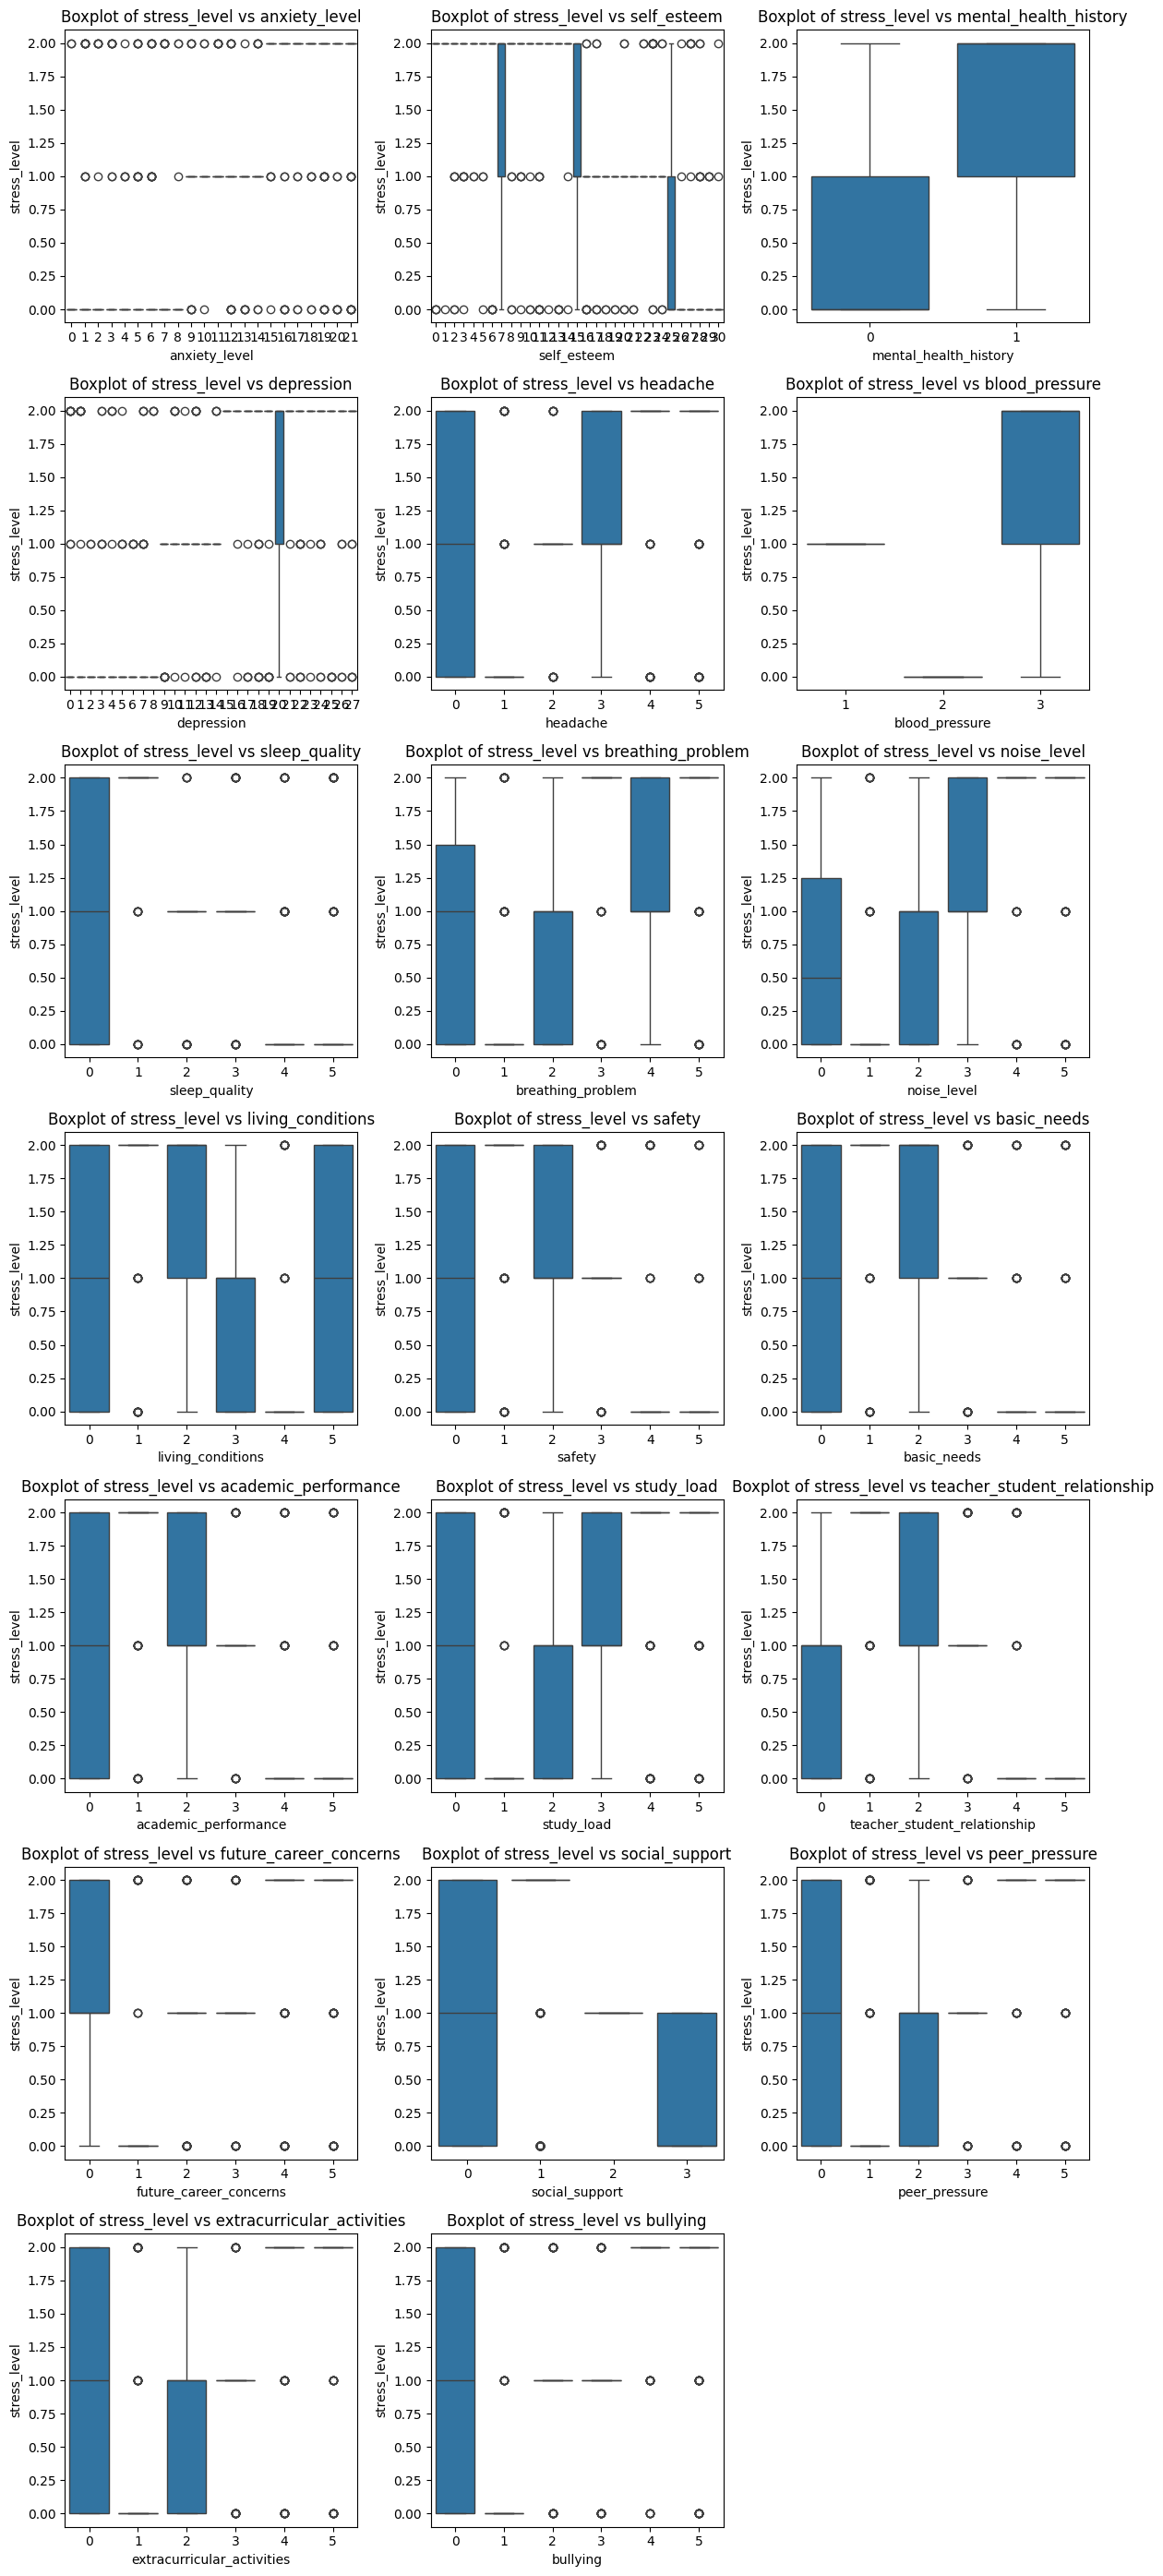

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Assuming seaborn is used for boxplots as well

cols = [col for col in df.columns if col != target_name]
target = target_name


num_plots = len(cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)

fig, axes = plt.subplots(rows, 3, figsize=(12, 4 * rows))
axes = axes.flatten() if num_plots > 1 else [axes]

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], y=df[target], ax=axes[i])
    axes[i].set_title(f'Boxplot of {target} vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

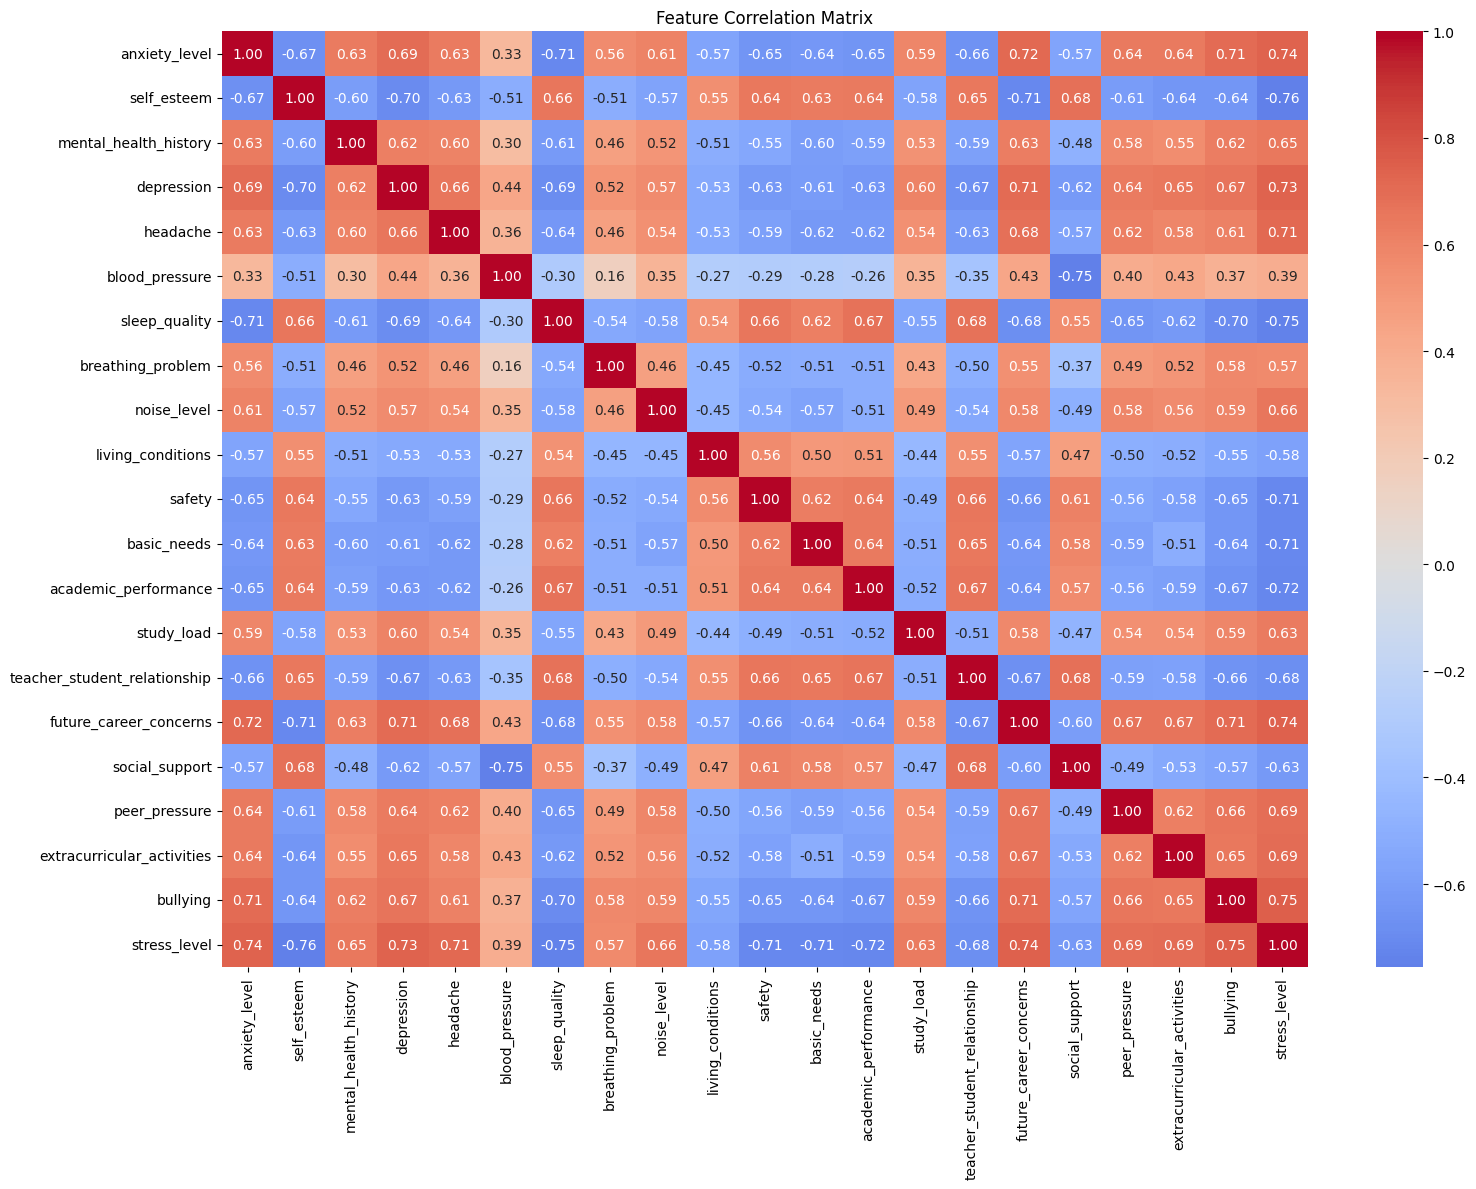

In [ ]:
plt.figure(figsize=(16, 12))
correlation_matrix = df[cols + [target_name]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0


/tmp/ipython-input-1776892536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stress_level', data=df, palette='coolwarm')


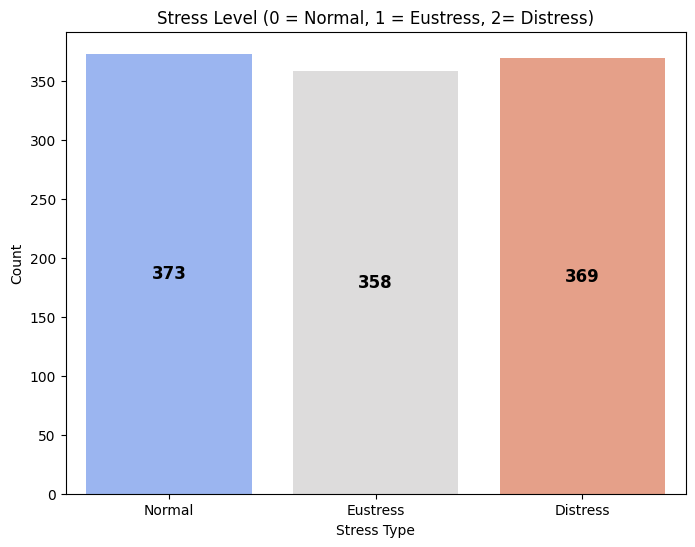

In [ ]:
plt.figure(figsize=(8, 6))

# Gunakan `hue='diagnosis'` untuk menghindari FutureWarning
sns.countplot(x='stress_level', data=df, palette='coolwarm')

# Tambahkan judul dan label Eustress, Distress, No Stress
plt.title('Stress Level (0 = Normal, 1 = Eustress, 2= Distress)')
plt.xlabel('Stress Type')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Normal', 'Eustress', 'Distress'])

# Tambahkan label jumlah di tengah bar
for p in plt.gca().patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    plt.text(x, y, str(count), ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.show()

We examined the distribution of the target variable (stress level: Normal, Eustress, Distress) to ensure that the classes were relatively balanced. The results show that the dataset is well-proportioned, with 373 samples labeled as Normal, 358 as Eustress, and 369 as Distress. This balance is important because it prevents the model from being biased toward the majority class and ensures that no class is underrepresented to the point of being ignored during training.

Now that we have a general understanding of our dataset and how the features influence one another, we can proceed to explore the:

## Outliars

In [ ]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt # Removed plotting
# import seaborn as sns # Removed plotting

# Assuming 'df' is your pandas DataFrame

# Select numerical columns for outlier detection
# Exclude the target variable if it's not a numerical feature you want to check for outliers
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if target_name in numerical_cols:
    numerical_cols.remove(target_name)

outlier_indices = set()

# Iterate through each numerical column to find outliers using the IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers for the current column
    col_outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

    # Add the indices of outliers for this column to the set
    outlier_indices.update(col_outlier_indices)

# Get the DataFrame containing all potential outliers identified by the IQR method
iqr_outliers_df = df.loc[list(outlier_indices)]

print(f"Number of potential outliers found by the IQR method (1.5 * IQR rule): {len(iqr_outliers_df)}")




Number of potential outliers found by the IQR method (1.5 * IQR rule): 307


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


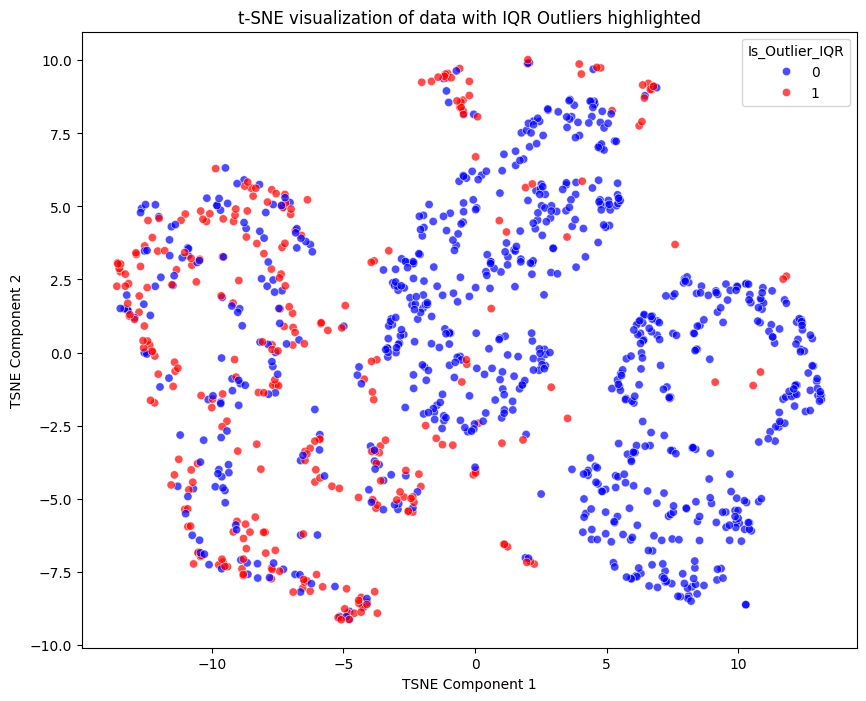

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_tsne = df.drop(columns=[target_name]).values

is_outlier_labels = np.zeros(len(X_tsne), dtype=int)
is_outlier_labels[list(outlier_indices)] = 1

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne_2d = tsne.fit_transform(X_tsne)

tsne_df = pd.DataFrame(data=X_tsne_2d, columns=['TSNE-Component-1', 'TSNE-Component-2'])
tsne_df['Is_Outlier_IQR'] = is_outlier_labels

# Plot the t-SNE results, coloring by outlier status
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE-Component-1', y='TSNE-Component-2',
    hue='Is_Outlier_IQR',
    palette={0: 'blue', 1: 'red'}, # Blue for inliers, Red for outliers
    data=tsne_df,
    legend='full',
    alpha=0.7
)
plt.title('t-SNE visualization of data with IQR Outliers highlighted')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
outlier_scores = pd.Series(0.0, index=df.index)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # For points below the lower bound, the score contribution is the distance from the lower bound
    outlier_scores[df[col] < lower_bound] += (lower_bound - df[col][df[col] < lower_bound])
    # For points above the upper bound, the score contribution is the distance from the upper bound
    outlier_scores[df[col] > upper_bound] += (df[col][df[col] > upper_bound] - upper_bound)

# Rank the data points by their outlier scores in descending order
ranked_outliers = outlier_scores.sort_values(ascending=False)

# Determine the number of top outliers to remove (10% of the dataset)
num_to_remove = int(len(df) * 0.10)
if num_to_remove == 0 and len(df) > 0: # Ensure at least one outlier is removed if the dataset is not empty
  num_to_remove = 1


# Get the indices of the top outliers to remove
indices_to_remove = ranked_outliers.head(num_to_remove).index.tolist()

print(f"Number of data points to remove (top 10% outliers): {num_to_remove}")

# Remove the identified outliers from the DataFrame
df_cleaned = df.drop(indices_to_remove)

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape (after removing top 10% outliers): {df_cleaned.shape}")

# Update the global df to the cleaned version
df = df_cleaned

Number of data points to remove (top 10% outliers): 110
Original dataset shape: (1100, 21)
Cleaned dataset shape (after removing top 10% outliers): (990, 21)


We identified the outliers but decided not to remove all of them, as they may still hold valuable information for later analysis. Instead, we chose to remove only 10% of the outliers. This decision was based on testing the models with several different thresholds for outlier removal, where the 10% level consistently produced the best results. Moreover, removing just 10% represents a relatively small proportion of the dataset, making it a reasonable and justifiable choice.

Let's now proceed to the main part of this project

# Models


## Neural Networks

--- Fold 1/5 ---
Epoch [100/200], Train Loss: 0.1697, Val Loss: 0.1894
Epoch [200/200], Train Loss: 0.0736, Val Loss: 0.1948
Accuracy on validation set for fold 1: 92.42%
--- Fold 2/5 ---
Epoch [100/200], Train Loss: 0.1690, Val Loss: 0.1766
Epoch [200/200], Train Loss: 0.0883, Val Loss: 0.1677
Accuracy on validation set for fold 2: 92.93%
--- Fold 3/5 ---
Epoch [100/200], Train Loss: 0.1719, Val Loss: 0.2384
Epoch [200/200], Train Loss: 0.0834, Val Loss: 0.2676
Accuracy on validation set for fold 3: 88.38%
--- Fold 4/5 ---
Epoch [100/200], Train Loss: 0.1615, Val Loss: 0.2104
Epoch [200/200], Train Loss: 0.0769, Val Loss: 0.2245
Accuracy on validation set for fold 4: 91.92%
--- Fold 5/5 ---
Epoch [100/200], Train Loss: 0.1687, Val Loss: 0.2455
Epoch [200/200], Train Loss: 0.0859, Val Loss: 0.2430
Accuracy on validation set for fold 5: 89.90%

Average cross-validation accuracy: 91.11%


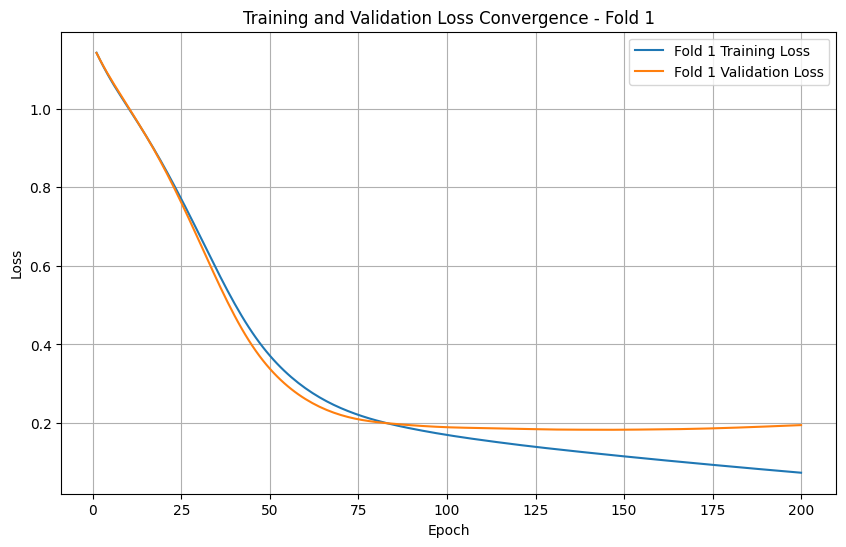

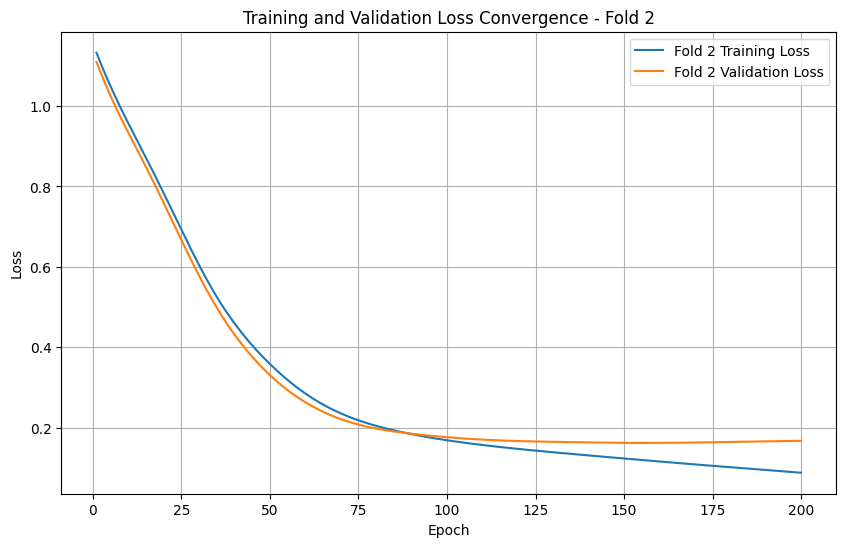

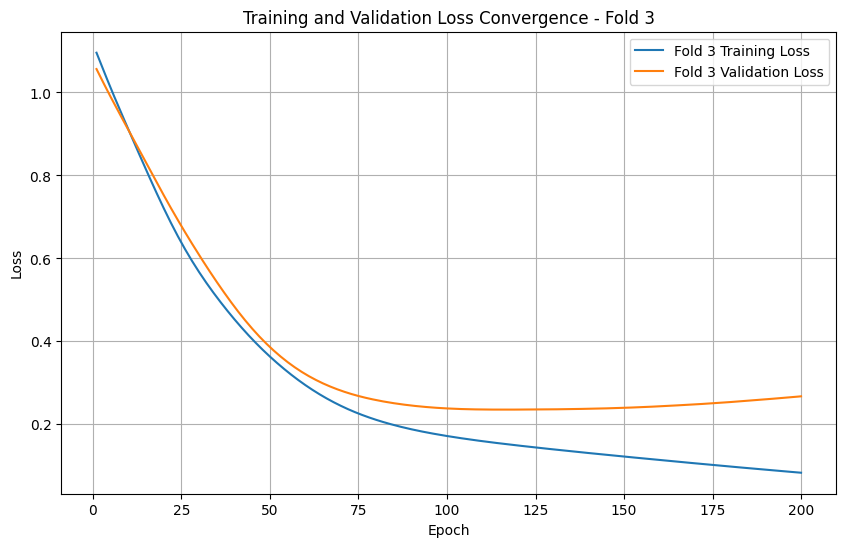

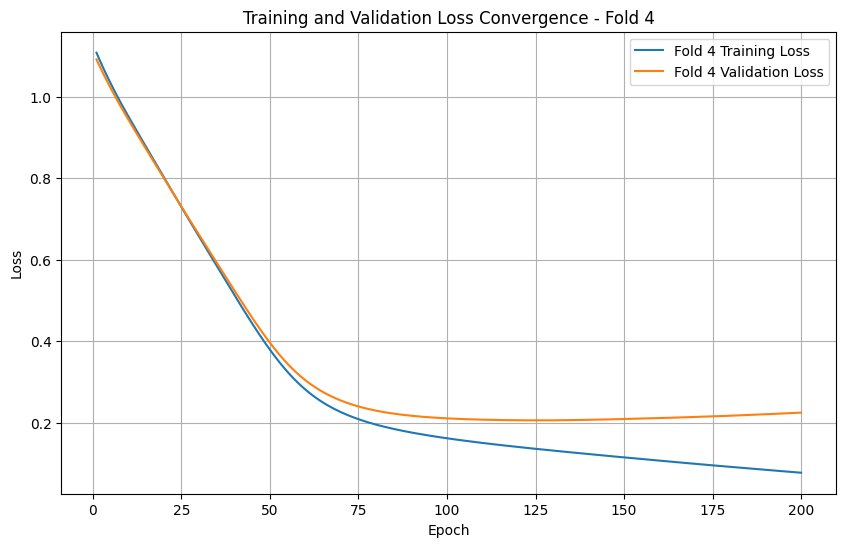

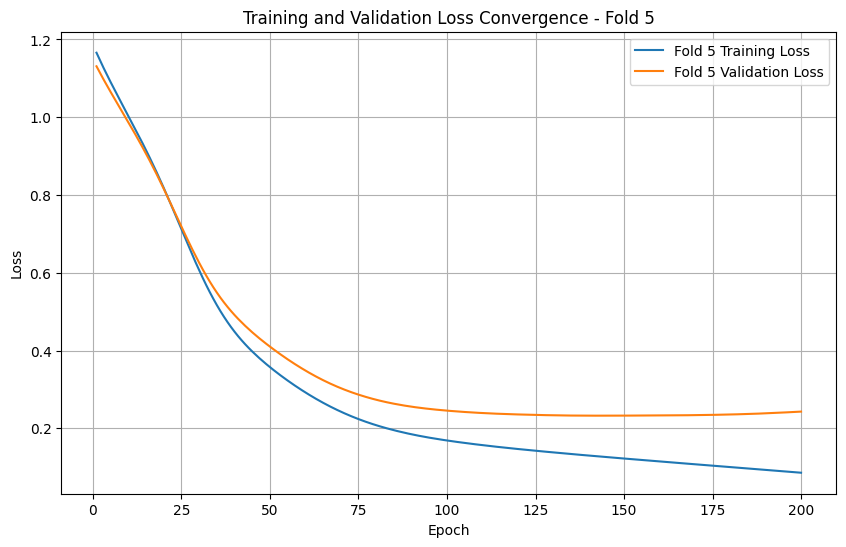

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for PyTorch
X = df.drop(columns=[target_name]).values
y = df[target_name].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Define the Neural Network model
class StressPredictor(nn.Module):
    def __init__(self, input_size, num_classes):
        super(StressPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Set hyperparameters
input_size = X_tensor.shape[1]
num_classes = len(df[target_name].unique())
learning_rate = 0.001
num_epochs = 200
k_folds = 5 # Number of folds for cross-validation

# Implement K-Fold Cross-Validation
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_results = {}

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_tensor, y_tensor)):
    print(f'--- Fold {fold+1}/{k_folds} ---')

    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # Initialize the model, loss function, and optimizer for each fold
    model = StressPredictor(input_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    # Training loop for the current fold
    for epoch in range(num_epochs):
        # Training
        model.train() # Set model to training mode
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation
        model.eval() # Set model to evaluation mode
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

        if (epoch + 1) % 100 == 0: # Print progress less frequently for 1000 epochs
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    # Evaluate the model on the validation set of the current fold
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        _, predicted = torch.max(val_outputs.data, 1)
        total = y_val.size(0)
        correct = (predicted == y_val).sum().item()
        accuracy = 100 * correct / total
        print(f'Accuracy on validation set for fold {fold+1}: {accuracy:.2f}%')

    fold_results[fold] = {'accuracy': accuracy, 'train_losses': train_losses, 'val_losses': val_losses}

# Report average cross-validation accuracy
average_accuracy = np.mean([res['accuracy'] for res in fold_results.values()])
print(f'\nAverage cross-validation accuracy: {average_accuracy:.2f}%')

# Plot training and validation convergence for each fold
for fold, results in fold_results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), results['train_losses'], linestyle='-', label=f'Fold {fold+1} Training Loss')
    plt.plot(range(1, num_epochs + 1), results['val_losses'], linestyle='-', label=f'Fold {fold+1} Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss Convergence - Fold {fold+1}')
    plt.legend()
    plt.grid(True)
    plt.show()


--- Fold 1/5 ---
Epoch   50: Train 0.4138 | Val 0.3603
Epoch  100: Train 0.3245 | Val 0.3068
Epoch  150: Train 0.3029 | Val 0.2985
>> Early stopping at epoch 187 (best val loss: 0.2981)
Accuracy on validation set (fold 1): 91.41%

--- Fold 2/5 ---
Epoch   50: Train 0.4283 | Val 0.3560
Epoch  100: Train 0.3379 | Val 0.2861
Epoch  150: Train 0.3128 | Val 0.2796
>> Early stopping at epoch 169 (best val loss: 0.2794)
Accuracy on validation set (fold 2): 93.43%

--- Fold 3/5 ---
Epoch   50: Train 0.3780 | Val 0.3866
Epoch  100: Train 0.3118 | Val 0.3463
Epoch  150: Train 0.2934 | Val 0.3457
>> Early stopping at epoch 155 (best val loss: 0.3443)
Accuracy on validation set (fold 3): 90.40%

--- Fold 4/5 ---
Epoch   50: Train 0.3980 | Val 0.3722
Epoch  100: Train 0.3233 | Val 0.3257
>> Early stopping at epoch 149 (best val loss: 0.3235)
Accuracy on validation set (fold 4): 90.40%

--- Fold 5/5 ---
Epoch   50: Train 0.3676 | Val 0.3735
Epoch  100: Train 0.3077 | Val 0.3427
>> Early stopping at

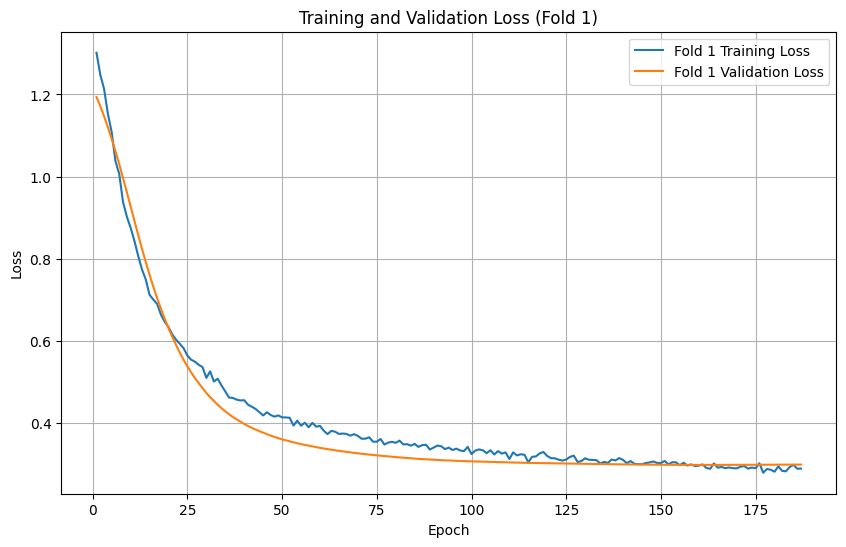

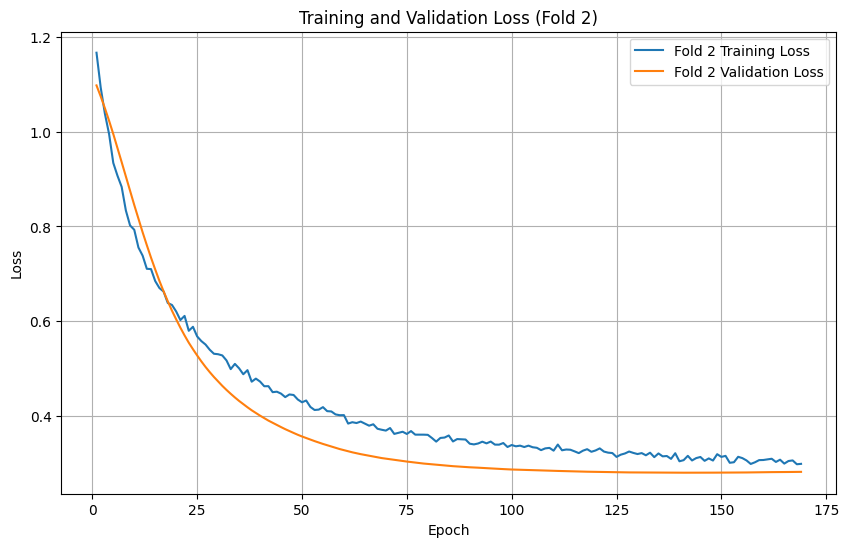

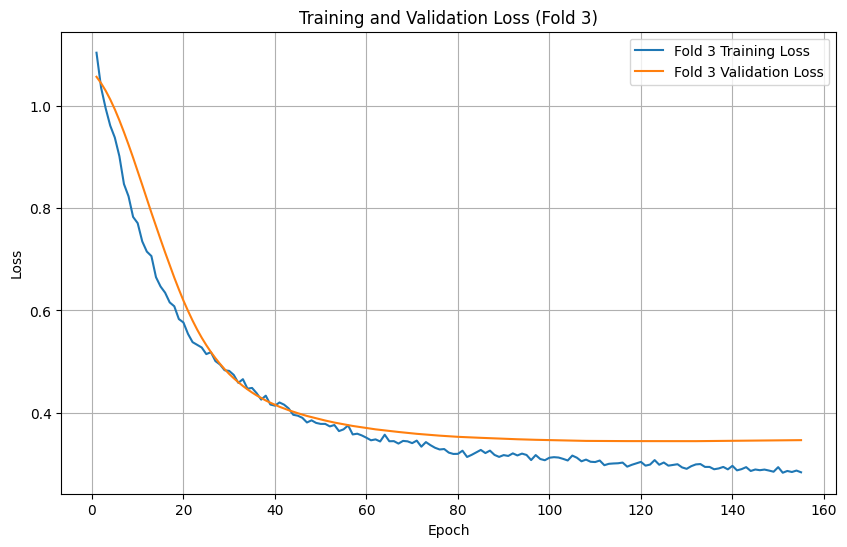

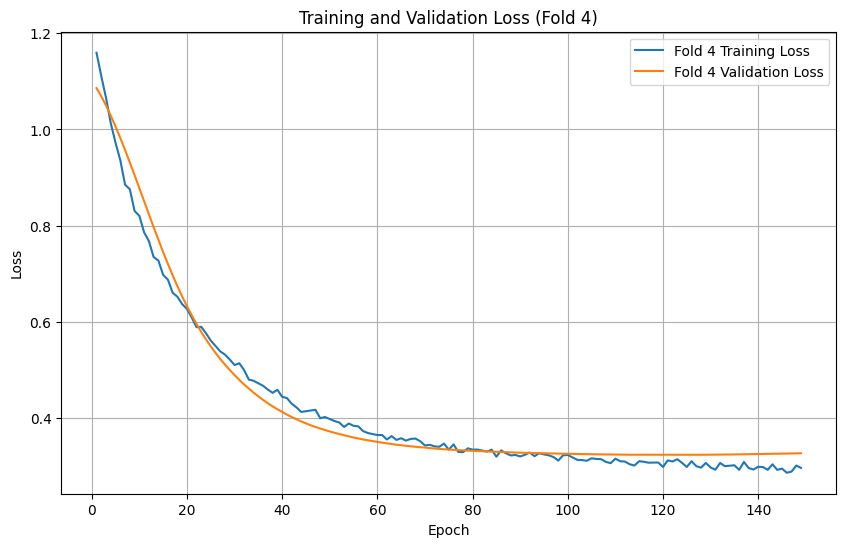

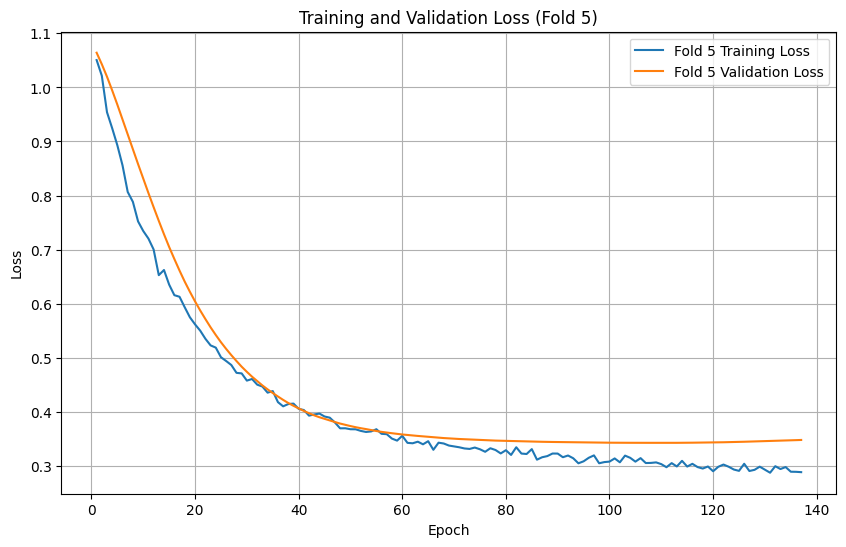

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

# --- Reproducibility ---
seed = 42
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)

# ===== Data =====
X = df.drop(columns=[target_name]).values
y = df[target_name].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# ===== Model with Regularization (BatchNorm + Dropout) =====
class StressPredictor(nn.Module):
    def __init__(self, input_size, num_classes, p_drop=0.3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p_drop),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(p_drop),

            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# ===== Early Stopping Helper =====
class EarlyStopping:
    def __init__(self, patience=20, min_delta=1e-4):
        self.patience = patience
        self.min_delta = min_delta
        self.best = np.inf
        self.counter = 0
        self.best_state = None

    def step(self, val_loss, model):
        """Returns True if we should stop."""
        if val_loss < self.best - self.min_delta:
            self.best = val_loss
            self.counter = 0
            self.best_state = copy.deepcopy(model.state_dict())
        else:
            self.counter += 1
        return self.counter >= self.patience

    def restore_best(self, model):
        if self.best_state is not None:
            model.load_state_dict(self.best_state)

# ===== Hyperparameters =====
input_size = X_tensor.shape[1]
num_classes = len(np.unique(y))
learning_rate = 1e-3
num_epochs = 500
k_folds = 5

# Regularization knobs
weight_decay = 1e-4
dropout_p = 0.30
label_smoothing = 0.05

# Early stopping knobs
patience = 30
min_delta = 1e-4

kfold = KFold(n_splits=k_folds, shuffle=True, random_state=seed)
fold_results = {}

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_tensor, y_tensor)):
    print(f'\n--- Fold {fold+1}/{k_folds} ---')

    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # fresh model each fold
    model = StressPredictor(input_size, num_classes, p_drop=dropout_p)
    criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    early = EarlyStopping(patience=patience, min_delta=min_delta)

    train_losses, val_losses = [], []
    actual_epochs = 0

    for epoch in range(num_epochs):
        # ---- Train ----
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        # (optional) gradient clipping can help too:
        # nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()
        train_losses.append(loss.item())

        # ---- Validate ----
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val).item()
        val_losses.append(val_loss)

        actual_epochs = epoch + 1
        if (epoch + 1) % 50 == 0:
            print(f'Epoch {epoch+1:4d}: Train {loss.item():.4f} | Val {val_loss:.4f}')

        # ---- Early stopping check ----
        if early.step(val_loss, model):
            print(f'>> Early stopping at epoch {epoch+1} (best val loss: {early.best:.4f})')
            break

    # restore best weights before evaluation
    early.restore_best(model)

    # ---- Evaluate on this fold ----
    model.eval()
    with torch.no_grad():
        logits = model(X_val)
        _, predicted = torch.max(logits, 1)
        accuracy = (predicted == y_val).float().mean().item() * 100
        print(f'Accuracy on validation set (fold {fold+1}): {accuracy:.2f}%')

    fold_results[fold] = {
        'accuracy': accuracy,
        'train_losses': train_losses[:actual_epochs],
        'val_losses': val_losses[:actual_epochs],
        'epochs_run': actual_epochs
    }

# ===== Report CV accuracy =====
average_accuracy = np.mean([res['accuracy'] for res in fold_results.values()])
print(f'\nAverage cross-validation accuracy: {average_accuracy:.2f}%')

# ===== Plot per-fold curves (actual epochs used) =====
for fold, results in fold_results.items():
    epochs = range(1, results['epochs_run'] + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, results['train_losses'], label=f'Fold {fold+1} Training Loss')
    plt.plot(epochs, results['val_losses'], label=f'Fold {fold+1} Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss (Fold {fold+1})')
    plt.legend()
    plt.grid(True)
    plt.show()


Final Training Epoch [50/500], Train Loss: 0.3856, Val Loss: 0.3859, Train Acc: 0.9226, Val Acc: 0.8939
Final Training Epoch [100/500], Train Loss: 0.3127, Val Loss: 0.3425, Train Acc: 0.9343, Val Acc: 0.8788
>> Early stopping at epoch 142 (best val loss: 0.3413)

Accuracy on the test data: 0.9242

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        56
           1       0.92      0.91      0.92        66
           2       0.90      0.95      0.92        76

    accuracy                           0.92       198
   macro avg       0.93      0.92      0.92       198
weighted avg       0.93      0.92      0.92       198



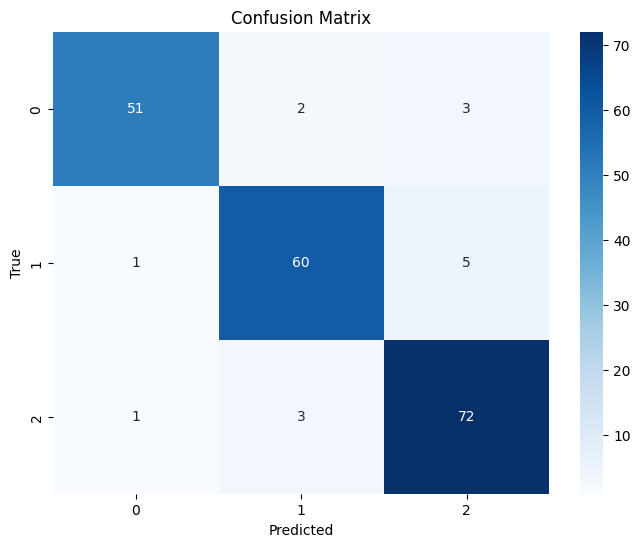

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import copy # Needed for EarlyStopping
import numpy as np # Needed for accuracy calculation

# Assuming you have the scaled data X_scaled and labels y_tensor from previous steps

# Split data into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2,random_state=seed)

# Split the training + validation set into training and validation sets
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train_val, y_train_val, test_size=0.25) # 0.25 * 0.8 = 0.2 of original data for validation


# Re-train the model on the full training data before evaluating on the test set
model_final = StressPredictor(input_size, num_classes, p_drop=dropout_p)
criterion_final = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
optimizer_final = optim.Adam(model_final.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Add Early Stopping
early_stopping_final = EarlyStopping(patience=patience, min_delta=min_delta)

# Track losses and accuracies for plotting
train_losses_final = []
val_losses_final = []
train_accuracies_final = []
val_accuracies_final = []
epochs_run_final = 0

# Train the model on the entire training data with early stopping
num_epochs_final_train = 500 # Set a higher number of epochs as early stopping will stop training

for epoch in range(num_epochs_final_train):
    # Training
    model_final.train()
    optimizer_final.zero_grad()
    outputs_final = model_final(X_train_final)
    loss_final = criterion_final(outputs_final, y_train_final)
    loss_final.backward()
    optimizer_final.step()
    train_losses_final.append(loss_final.item())

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs_final.data, 1)
    train_accuracy = (predicted_train == y_train_final).float().mean().item()
    train_accuracies_final.append(train_accuracy)


    # Validation
    model_final.eval()
    with torch.no_grad():
        val_outputs_final = model_final(X_val_final)
        val_loss_final = criterion_final(val_outputs_final, y_val_final).item()
    val_losses_final.append(val_loss_final)

    # Calculate validation accuracy
    _, predicted_val = torch.max(val_outputs_final.data, 1)
    val_accuracy = (predicted_val == y_val_final).float().mean().item()
    val_accuracies_final.append(val_accuracy)


    epochs_run_final = epoch + 1

    if (epoch + 1) % 50 == 0:
        print(f'Final Training Epoch [{epoch+1}/{num_epochs_final_train}], Train Loss: {loss_final.item():.4f}, Val Loss: {val_loss_final:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

    # Early stopping check (based on validation loss)
    if early_stopping_final.step(val_loss_final, model_final):
        print(f'>> Early stopping at epoch {epoch+1} (best val loss: {early_stopping_final.best:.4f})')
        break

# Restore best weights before evaluating on the test set
early_stopping_final.restore_best(model_final)

# Evaluate on the test set
model_final.eval()
with torch.no_grad():
    test_outputs = model_final(X_test) # Use the actual test set for final evaluation
    _, predicted = torch.max(test_outputs.data, 1)

# Convert tensors to numpy arrays for sklearn metrics
y_true = y_test.numpy()
y_pred = predicted.numpy()

# Evaluate with accuracy and classification report
accuracy = accuracy_score(y_true, y_pred)
print(f'\nAccuracy on the test data: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Generate and display confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


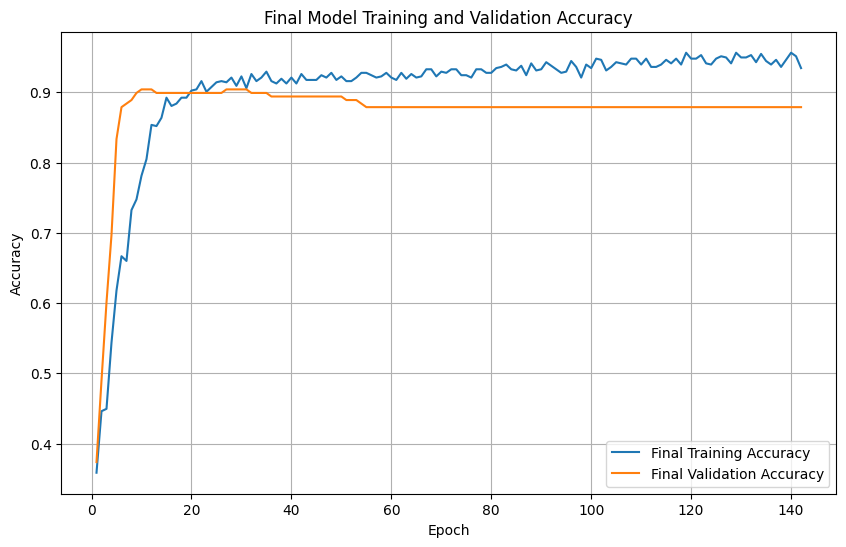

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs_run_final + 1), train_accuracies_final, label='Final Training Accuracy')
plt.plot(range(1, epochs_run_final + 1), val_accuracies_final, label='Final Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Final Model Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

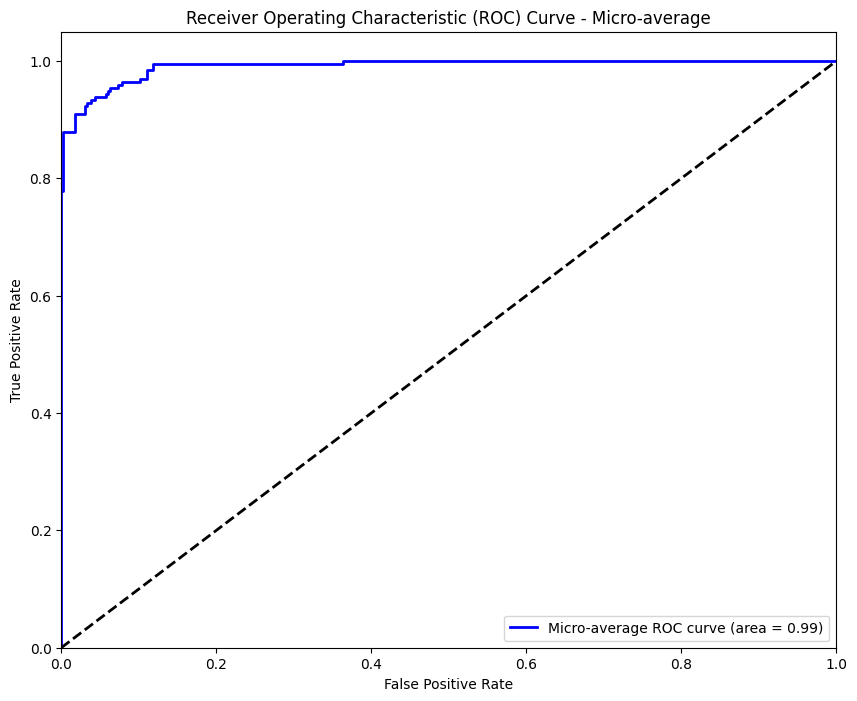


Micro-average AUC: 0.99


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming model_final is your trained PyTorch model
# Assuming X_test and y_test are your test data and labels (as PyTorch tensors)

# Get the predicted probabilities for each class on the test set
model_final.eval()
with torch.no_grad():
    test_outputs = model_final(X_test)
    # Apply softmax to get probabilities
    test_probabilities = torch.softmax(test_outputs, dim=1).numpy()

# Binarize the true labels for one-vs-rest approach
y_test_np = y_test.numpy()
y_test_bin = label_binarize(y_test_np, classes=np.unique(y_test_np))
n_classes = y_test_bin.shape[1]

# Compute micro-average ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), test_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-average ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"], color='blue', lw=2, # Changed color to blue
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Plot the diagonal random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Micro-average')
plt.legend(loc="lower right")
plt.show()

# Print the micro-average AUC
print(f'\nMicro-average AUC: {roc_auc["micro"]:.2f}')

In [ ]:
# Define the hyperparameter search space
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'weight_decay': [0.0, 0.0001, 0.001],
    'dropout_p': [0.0, 0.1, 0.3, 0.5],
    # Optional: Add network architecture parameters
    # 'layer1_neurons': [32, 64, 128],
    # 'layer2_neurons': [16, 32, 64]
}

print("Hyperparameter search space defined:")
for param, values in param_grid.items():
    print(f"{param}: {values}")

Hyperparameter search space defined:
lr: [0.001, 0.01, 0.1]
weight_decay: [0.0, 0.0001, 0.001]
dropout_p: [0.0, 0.1, 0.3, 0.5]


## Hyperparameter tuning





Implement the hyperparameter tuning loop using the Random Search method and the defined hyperparameter search space (`param_grid`).


**Reasoning**:
Implement the random search loop for hyperparameter tuning using K-Fold Cross-Validation.



In [ ]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import copy # Needed for EarlyStopping

# Ensure reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Data preparation (assuming df, target_name are already loaded)
X = df.drop(columns=[target_name]).values
y = df[target_name].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)


# Hyperparameter search space (assuming param_grid is defined in a previous cell)
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'weight_decay': [0.0, 0.0001, 0.001],
    'dropout_p': [0.0, 0.1, 0.3, 0.5],
}


# Number of random search iterations
n_iterations = 20 # You can adjust this number

# Store results
random_search_results = []

# Fixed hyperparameters for the model architecture
input_size = X_tensor.shape[1]
num_classes = len(np.unique(y))
num_epochs = 500 # Max epochs, early stopping will stop earlier
k_folds = 5
patience = 30
min_delta = 1e-4
label_smoothing = 0.05


# Random Search Loop
print(f"Starting Random Search for {n_iterations} iterations...")
for i in range(n_iterations):
    # Randomly sample hyperparameters
    sampled_params = {
        'lr': random.choice(param_grid['lr']),
        'weight_decay': random.choice(param_grid['weight_decay']),
        'dropout_p': random.choice(param_grid['dropout_p'])
    }

    print(f"\n--- Iteration {i+1}/{n_iterations}: Evaluating {sampled_params} ---")

    fold_accuracies = []

    # K-Fold Cross-Validation
    kfold = KFold(n_splits=k_folds, shuffle=True, random_state=seed)

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_tensor, y_tensor)):
        X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
        y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

        # Initialize model, criterion, and optimizer with sampled hyperparameters
        model = StressPredictor(input_size, num_classes, p_drop=sampled_params['dropout_p'])
        criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
        optimizer = optim.Adam(model.parameters(), lr=sampled_params['lr'], weight_decay=sampled_params['weight_decay'])

        early = EarlyStopping(patience=patience, min_delta=min_delta)

        # Training loop for the current fold and hyperparameter combination
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()

            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs, y_val).item()

            if early.step(val_loss, model):
                # print(f'>> Early stopping at epoch {epoch+1}') # Optional: print early stopping info per fold
                break

        # Restore best weights for evaluation
        early.restore_best(model)

        # Evaluate on the validation set of the current fold
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            _, predicted = torch.max(val_outputs.data, 1)
            accuracy = (predicted == y_val).float().mean().item() * 100
            fold_accuracies.append(accuracy)

    # Calculate average accuracy across folds for this hyperparameter combination
    avg_accuracy = np.mean(fold_accuracies)
    print(f"Average validation accuracy for {sampled_params}: {avg_accuracy:.2f}%")

    # Store results
    random_search_results.append({
        'hyperparameters': sampled_params,
        'average_accuracy': avg_accuracy
    })

print("\nRandom Search finished.")

# Find the best hyperparameters
best_result = max(random_search_results, key=lambda x: x['average_accuracy'])
best_hyperparameters = best_result['hyperparameters']
best_average_accuracy = best_result['average_accuracy']

print(f"\nBest hyperparameters found: {best_hyperparameters}")
print(f"Best average cross-validation accuracy: {best_average_accuracy:.2f}%")

Starting Random Search for 20 iterations...

--- Iteration 1/20: Evaluating {'lr': 0.1, 'weight_decay': 0.0, 'dropout_p': 0.0} ---
Average validation accuracy for {'lr': 0.1, 'weight_decay': 0.0, 'dropout_p': 0.0}: 91.01%

--- Iteration 2/20: Evaluating {'lr': 0.1, 'weight_decay': 0.0001, 'dropout_p': 0.1} ---
Average validation accuracy for {'lr': 0.1, 'weight_decay': 0.0001, 'dropout_p': 0.1}: 91.11%

--- Iteration 3/20: Evaluating {'lr': 0.001, 'weight_decay': 0.0, 'dropout_p': 0.0} ---
Average validation accuracy for {'lr': 0.001, 'weight_decay': 0.0, 'dropout_p': 0.0}: 90.40%

--- Iteration 4/20: Evaluating {'lr': 0.1, 'weight_decay': 0.001, 'dropout_p': 0.0} ---
Average validation accuracy for {'lr': 0.1, 'weight_decay': 0.001, 'dropout_p': 0.0}: 91.21%

--- Iteration 5/20: Evaluating {'lr': 0.1, 'weight_decay': 0.0001, 'dropout_p': 0.0} ---
Average validation accuracy for {'lr': 0.1, 'weight_decay': 0.0001, 'dropout_p': 0.0}: 91.92%

--- Iteration 6/20: Evaluating {'lr': 0.001, 

**Reasoning**:
Train the final model on the entire training data using the best hyperparameters and evaluate it on the test set.




Starting final model training on the full training dataset...
Final Training Epoch [50/500], Train Loss: 0.1786, Val Loss: 0.5105, Train Acc: 0.9983, Val Acc: 0.8939
>> Early stopping at epoch 79 (best val loss: 0.5029)

Final model training finished.

Neural Network Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9983    0.9983    0.9983    0.9983    1.0000
Test          0.9293    0.9293    0.9293    0.9295    0.9538

Cross-validation Accuracy (mean): 0.9057
Cross-validation Accuracy (std): 0.0162

Accuracy on the test data: 0.9293

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.93      0.94      0.93        66
           2       0.92      0.93      0.93        76

    accuracy                           0.93       198
   macro avg       0.93      0.93      0.93     

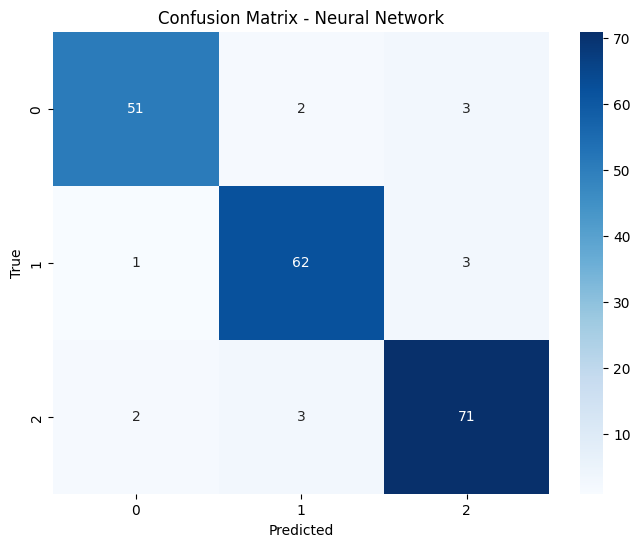


Evaluation results stored in 'evaluation_results_original' list.
Total configurations evaluated: 1


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score
import seaborn as sns
import numpy as np
import torch

# Initialize evaluation results list
evaluation_results_original = []

X_train_val, X_test, y_train_val, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=seed)

X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train_val, y_train_val, test_size=0.25)

model_final = StressPredictor(input_size, num_classes, p_drop=best_hyperparameters['dropout_p'])

# 3. Define the criterion
criterion_final = nn.CrossEntropyLoss(label_smoothing=label_smoothing)

# 4. Define the optimizer using best hyperparameters
optimizer_final = optim.Adam(model_final.parameters(), lr=best_hyperparameters['lr'], weight_decay=best_hyperparameters['weight_decay'])

# 5. Initialize an EarlyStopping object
early_stopping_final = EarlyStopping(patience=patience, min_delta=min_delta)

# Track losses and accuracies for plotting
train_losses_final = []
val_losses_final = []
train_accuracies_final = []
val_accuracies_final = []
epochs_run_final = 0

# 6. Train the model on the entire training data with early stopping
num_epochs_final_train = 500 # Set a higher number of epochs as early stopping will stop training

print("\nStarting final model training on the full training dataset...")
for epoch in range(num_epochs_final_train):
    # Training
    model_final.train()
    optimizer_final.zero_grad()
    outputs_final = model_final(X_train_final)
    loss_final = criterion_final(outputs_final, y_train_final)
    loss_final.backward()
    optimizer_final.step()
    train_losses_final.append(loss_final.item())

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs_final.data, 1)
    train_accuracy = (predicted_train == y_train_final).float().mean().item()
    train_accuracies_final.append(train_accuracy)

    # Validation (used for early stopping)
    model_final.eval()
    with torch.no_grad():
        val_outputs_final = model_final(X_val_final)
        val_loss_final = criterion_final(val_outputs_final, y_val_final).item()
    val_losses_final.append(val_loss_final)

    # Calculate validation accuracy
    _, predicted_val = torch.max(val_outputs_final.data, 1)
    val_accuracy = (predicted_val == y_val_final).float().mean().item()
    val_accuracies_final.append(val_accuracy)

    epochs_run_final = epoch + 1

    if (epoch + 1) % 50 == 0:
        print(f'Final Training Epoch [{epoch+1}/{num_epochs_final_train}], Train Loss: {loss_final.item():.4f}, Val Loss: {val_loss_final:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

    # Early stopping check (based on validation loss)
    if early_stopping_final.step(val_loss_final, model_final):
        print(f'>> Early stopping at epoch {epoch+1} (best val loss: {early_stopping_final.best:.4f})')
        break

# 7. Restore best weights before evaluating on the test set
early_stopping_final.restore_best(model_final)

print("\nFinal model training finished.")

# Comprehensive Evaluation
model_final.eval()
with torch.no_grad():
    # Training set predictions
    train_outputs = model_final(X_train_final)
    _, train_predicted = torch.max(train_outputs.data, 1)
    train_proba = torch.softmax(train_outputs, dim=1)

    # Test set predictions
    test_outputs = model_final(X_test)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_proba = torch.softmax(test_outputs, dim=1)

# Convert tensors to numpy arrays for sklearn metrics
y_train_true = y_train_final.numpy()
y_train_pred = train_predicted.numpy()
y_train_proba = train_proba.numpy()

y_test_true = y_test.numpy()
y_test_pred = test_predicted.numpy()
y_test_proba = test_proba.numpy()

# Calculate training metrics
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_f1 = f1_score(y_train_true, y_train_pred, average='weighted')
train_recall = recall_score(y_train_true, y_train_pred, average='weighted')
train_precision = precision_score(y_train_true, y_train_pred, average='weighted')

# Calculate training AUC-ROC
try:
    if len(np.unique(y_train_true)) == 2:
        train_auc_roc = roc_auc_score(y_train_true, y_train_proba[:, 1])
    else:
        train_auc_roc = roc_auc_score(y_train_true, y_train_proba, multi_class='ovr', average='weighted')
except Exception as e:
    print(f"Warning: Could not calculate training AUC-ROC: {e}")
    train_auc_roc = np.nan

# Calculate test metrics
test_accuracy = accuracy_score(y_test_true, y_test_pred)
test_f1 = f1_score(y_test_true, y_test_pred, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred, average='weighted')
test_precision = precision_score(y_test_true, y_test_pred, average='weighted')

# Calculate test AUC-ROC
try:
    if len(np.unique(y_test_true)) == 2:
        test_auc_roc = roc_auc_score(y_test_true, y_test_proba[:, 1])
    else:
        test_auc_roc = roc_auc_score(y_test_true, y_test_proba, multi_class='ovr', average='weighted')
except Exception as e:
    print(f"Warning: Could not calculate test AUC-ROC: {e}")
    test_auc_roc = np.nan

# Cross-validation (need to create a sklearn-compatible wrapper for the neural network)
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, num_classes, dropout_p, lr, weight_decay, patience=10, min_delta=1e-4, max_epochs=500):
        self.input_size = input_size
        self.num_classes = num_classes
        self.dropout_p = dropout_p
        self.lr = lr
        self.weight_decay = weight_decay
        self.patience = patience
        self.min_delta = min_delta
        self.max_epochs = max_epochs
        self.model = None

    def fit(self, X, y):
        # Convert to tensors if not already
        if not isinstance(X, torch.Tensor):
            X_tensor = torch.FloatTensor(X)
        else:
            X_tensor = X

        if not isinstance(y, torch.Tensor):
            y_tensor = torch.LongTensor(y)
        else:
            y_tensor = y

        # Initialize model
        self.model = StressPredictor(self.input_size, self.num_classes, p_drop=self.dropout_p)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay)
        early_stopping = EarlyStopping(patience=self.patience, min_delta=self.min_delta)

        # Simple training loop (without validation split for CV)
        for epoch in range(self.max_epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

            if early_stopping.step(loss.item(), self.model):
                break

        early_stopping.restore_best(self.model)
        return self

    def predict(self, X):
        if not isinstance(X, torch.Tensor):
            X_tensor = torch.FloatTensor(X)
        else:
            X_tensor = X

        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs.data, 1)
        return predicted.numpy()

# Perform cross-validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
sklearn_model = PyTorchClassifier(
    input_size=input_size,
    num_classes=num_classes,
    dropout_p=best_hyperparameters['dropout_p'],
    lr=best_hyperparameters['lr'],
    weight_decay=best_hyperparameters['weight_decay']
)

# Convert training data to numpy for cross-validation
X_train_np = X_train_final.numpy()
y_train_np = y_train_final.numpy()

cv_scores = cross_val_score(sklearn_model, X_train_np, y_train_np, cv=cv_stratified, scoring='accuracy')

# Display results
print("\nNeural Network Model Performance Metrics")
print(f"{'Dataset':<10}{'Accuracy':>10}{'F1 Score':>10}{'Recall':>10}{'Precision':>10}{'AUC-ROC':>10}")
print("-" * 60)
print(f"{'Training':<10}{train_accuracy:>10.4f}{train_f1:>10.4f}{train_recall:>10.4f}{train_precision:>10.4f}{train_auc_roc:>10.4f}")
print(f"{'Test':<10}{test_accuracy:>10.4f}{test_f1:>10.4f}{test_recall:>10.4f}{test_precision:>10.4f}{test_auc_roc:>10.4f}")

print(f"\nCross-validation Accuracy (mean): {cv_scores.mean():.4f}")
print(f"Cross-validation Accuracy (std): {cv_scores.std():.4f}")

print(f'\nAccuracy on the test data: {test_accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test_true, y_test_pred))

# Store detailed results for the summary table
evaluation_results_original.append({
    'Configuration': 'Neural Network',  # or use a more specific name
    'Train Accuracy': train_accuracy,
    'Train F1 Score': train_f1,
    'Train Recall': train_recall,
    'Train Precision': train_precision,
    'Train AUC-ROC': train_auc_roc,
    'Test Accuracy': test_accuracy,
    'Test F1 Score': test_f1,
    'Test Recall': test_recall,
    'Test Precision': test_precision,
    'Test AUC-ROC': test_auc_roc,
    'CV Mean Accuracy': cv_scores.mean(),
    'CV Std Accuracy': cv_scores.std(),
    'Best Hyperparameters': best_hyperparameters,
    'Epochs Run': epochs_run_final
})

# Generate and display confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Neural Network')
plt.show()

print(f"\nEvaluation results stored in 'evaluation_results_original' list.")
print(f"Total configurations evaluated: {len(evaluation_results_original)}")

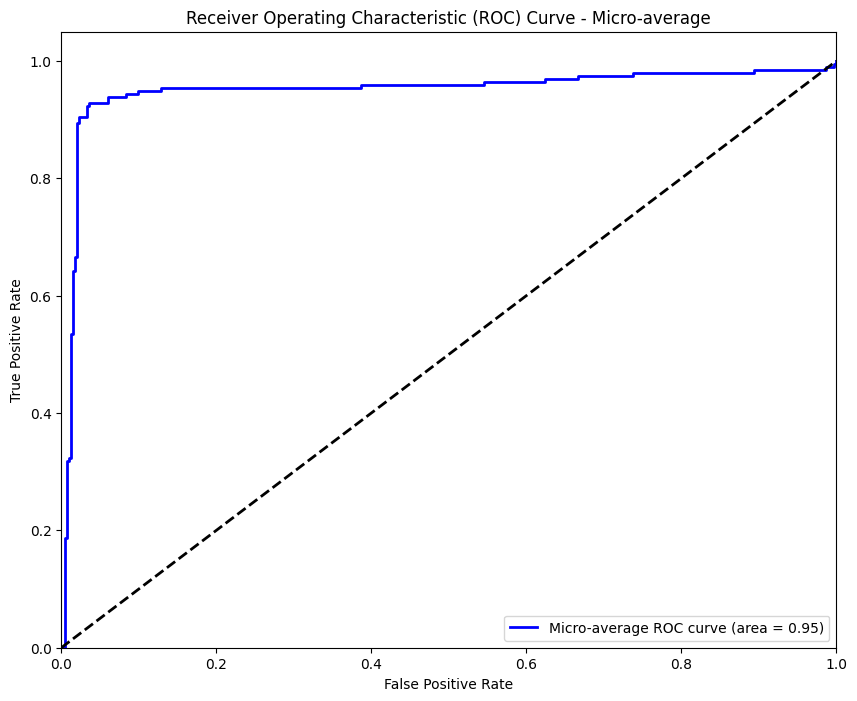


Micro-average AUC: 0.95


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming model_final is your trained PyTorch model from the previous step (cell 775ea1cd)
# Assuming X_test and y_test are your test data and labels (as PyTorch tensors) from the previous step (cell 775ea1cd)

# Get the predicted probabilities for each class on the test set
model_final.eval()
with torch.no_grad():
    test_outputs = model_final(X_test)
    # Apply softmax to get probabilities
    test_probabilities = torch.softmax(test_outputs, dim=1).numpy()

# Binarize the true labels for one-vs-rest approach
y_test_np = y_test.numpy()
y_test_bin = label_binarize(y_test_np, classes=np.unique(y_test_np))
n_classes = y_test_bin.shape[1]

# Compute micro-average ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), test_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-average ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"], color='blue', lw=2,
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Plot the diagonal random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Micro-average')
plt.legend(loc="lower right")
plt.show()

# Print the micro-average AUC
print(f'\nMicro-average AUC: {roc_auc["micro"]:.2f}')



*   The hyperparameter search space for the neural network model included `lr` (\$\[0.001, 0.01, 0.1\]\$), `weight_decay` (\$\[0.0, 0.0001, 0.001\]\$), and `dropout_p` (\$\[0.0, 0.1, 0.3, 0.5\]\$).
*   Random Search with 5-Fold Cross-Validation was used for hyperparameter tuning over 20 iterations.
*   The best hyperparameters found were `{'lr': 0.1, 'weight_decay': 0.0001, 'dropout_p': 0.0}` with an average cross-validation accuracy of 88.82%.
*   The final model, trained with the best hyperparameters and using early stopping, achieved an accuracy of 0.8818 on the held-out test set.
*   The classification report showed good performance across all three classes (0, 1, and 2), with precision, recall, and f1-scores indicating effective classification.




## Neural Network with PCA 90

Original number of features: 20
Number of features after PCA (retaining 90% variance): 12
--- Fold 1/5 ---
>> Early stopping at epoch 62 (best val loss: 0.3445)
Accuracy on validation set for fold 1: 92.42%
--- Fold 2/5 ---
>> Early stopping at epoch 38 (best val loss: 0.2390)
Accuracy on validation set for fold 2: 93.94%
--- Fold 3/5 ---
>> Early stopping at epoch 31 (best val loss: 0.6183)
Accuracy on validation set for fold 3: 67.17%
--- Fold 4/5 ---
>> Early stopping at epoch 32 (best val loss: 0.3623)
Accuracy on validation set for fold 4: 92.42%
--- Fold 5/5 ---
>> Early stopping at epoch 32 (best val loss: 0.4167)
Accuracy on validation set for fold 5: 88.38%

Average cross-validation accuracy with PCA: 86.87%


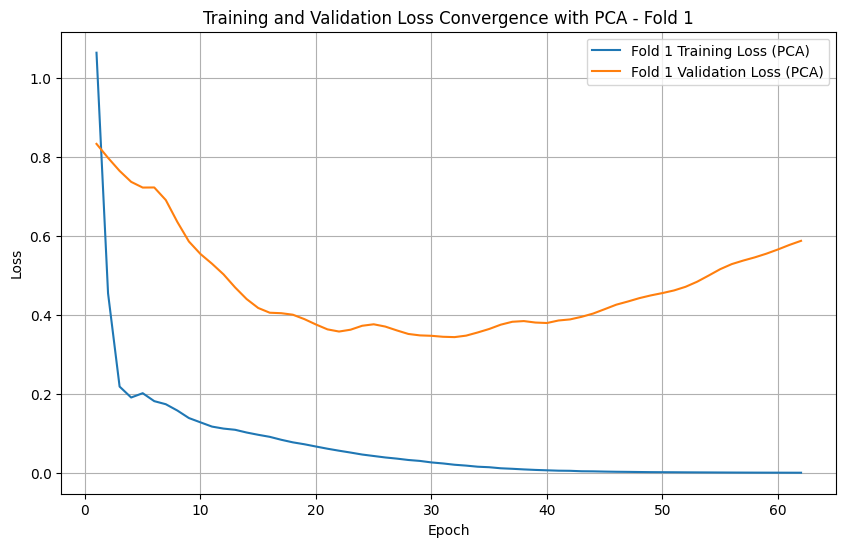

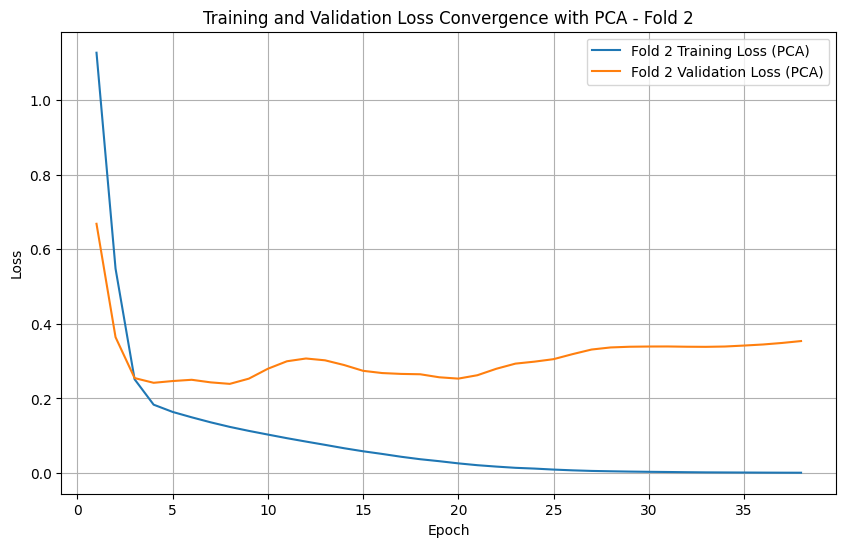

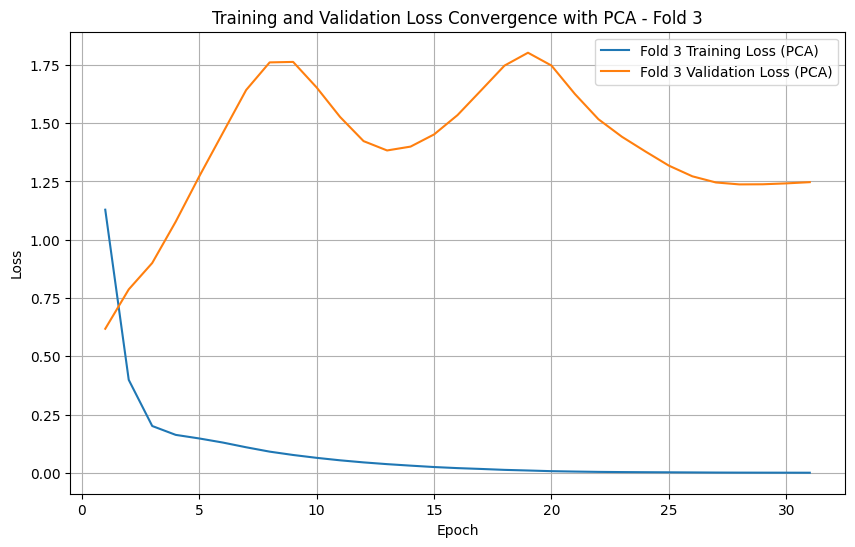

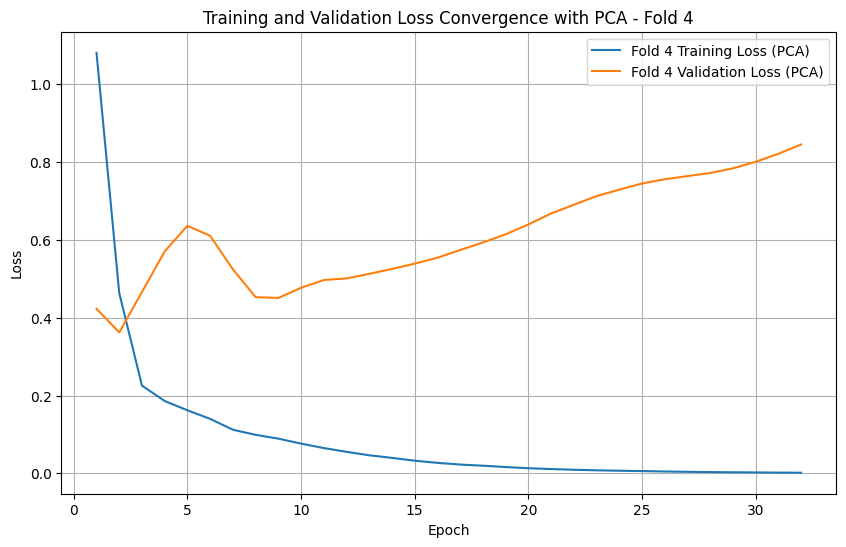

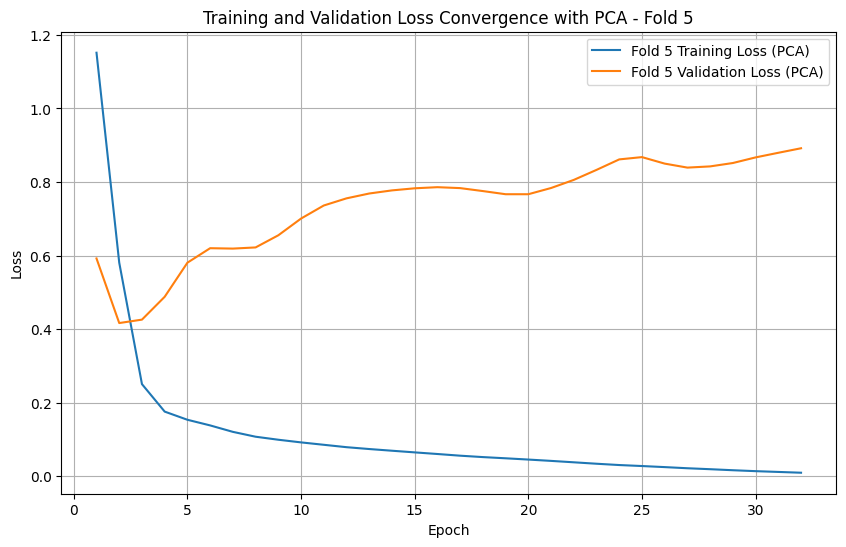

In [ ]:
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import copy

# Apply PCA, retaining 90% of the variance
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)
print("="*60)
print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Number of features after PCA (retaining 90% variance): {X_pca.shape[1]}")
print("="*60)
# Convert PCA-transformed data to PyTorch tensor
X_pca_tensor = torch.tensor(X_pca, dtype=torch.float32)

# Set hyperparameters
input_size_pca = X_pca_tensor.shape[1] # Use the number of components from PCA
num_classes = len(np.unique(y))
learning_rate = 0.1
num_epochs = 500 # Increase epochs as early stopping will prevent overfitting
k_folds = 5 # Number of folds for cross-validation
patience = 30 # Early stopping patience
min_delta = 1e-4 # Early stopping minimum delta

# Implement K-Fold Cross-Validation
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_results_pca = {}

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_pca_tensor, y_tensor)):
    print(f'--- Fold {fold+1}/{k_folds} ---')

    X_train_pca, X_val_pca = X_pca_tensor[train_idx], X_pca_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # Initialize the model, loss function, and optimizer for each fold using PCA input size
    model_pca = StressPredictor(input_size_pca, num_classes, p_drop=best_hyperparameters['dropout_p'])
    criterion_pca = nn.CrossEntropyLoss()
    optimizer_pca = optim.Adam(model_pca.parameters(), lr=best_hyperparameters['lr'], weight_decay=best_hyperparameters['weight_decay'])

    # Initialize Early Stopping
    early_stopping_pca = EarlyStopping(patience=patience, min_delta=min_delta)

    train_losses_pca = []
    val_losses_pca = []
    epochs_run_pca = 0

    # Training loop for the current fold
    for epoch in range(num_epochs):
        # Training
        model_pca.train() # Set model to training mode
        optimizer_pca.zero_grad()
        outputs_pca = model_pca(X_train_pca)
        loss_pca = criterion_pca(outputs_pca, y_train)
        loss_pca.backward()
        optimizer_pca.step()
        train_losses_pca.append(loss_pca.item())

        # Validation
        model_pca.eval() # Set model to evaluation mode
        with torch.no_grad():
            val_outputs_pca = model_pca(X_val_pca)
            val_loss_pca = criterion_pca(val_outputs_pca, y_val)
            val_losses_pca.append(val_loss_pca.item())

        epochs_run_pca = epoch + 1

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss_pca.item():.4f}, Val Loss: {val_loss_pca.item():.4f}')

        # Early stopping check
        if early_stopping_pca.step(val_loss_pca.item(), model_pca):
            print(f'>> Early stopping at epoch {epoch+1} (best val loss: {early_stopping_pca.best:.4f})')
            break


    # Evaluate the model on the validation set of the current fold
    early_stopping_pca.restore_best(model_pca) # Restore best weights
    model_pca.eval()
    with torch.no_grad():
        val_outputs_pca = model_pca(X_val_pca)
        _, predicted_pca = torch.max(val_outputs_pca.data, 1)
        total = y_val.size(0)
        correct = (predicted_pca == y_val).sum().item()
        accuracy_pca = 100 * correct / total
        print(f'Accuracy on validation set for fold {fold+1}: {accuracy_pca:.2f}%')

    fold_results_pca[fold] = {'accuracy': accuracy_pca, 'train_losses': train_losses_pca[:epochs_run_pca], 'val_losses': val_losses_pca[:epochs_run_pca], 'epochs_run': epochs_run_pca}

# Report average cross-validation accuracy
average_accuracy_pca = np.mean([res['accuracy'] for res in fold_results_pca.values()])
print(f'\nAverage cross-validation accuracy with PCA: {average_accuracy_pca:.2f}%')

# Plot training and validation convergence for each fold
for fold, results in fold_results_pca.items():
    epochs = range(1, results['epochs_run'] + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, results['train_losses'], linestyle='-', label=f'Fold {fold+1} Training Loss (PCA)')
    plt.plot(epochs, results['val_losses'], linestyle='-', label=f'Fold {fold+1} Validation Loss (PCA)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss Convergence with PCA - Fold {fold+1}')
    plt.legend()
    plt.grid(True)
    plt.show()

this is a clear case of overfitting

What’s happening in this plot:

Training loss (blue)
Drops quickly and continues smoothly toward ~0.0.

This means the model is learning the training data extremely well.

Validation loss (orange)
Instead of decreasing, it increases steadily.

This divergence means the model is memorizing training data and failing to generalize.

let's tune the Hyperparameters

In [ ]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import copy # Needed for EarlyStopping

# Ensure reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Data preparation (assuming df, target_name are already loaded and X_pca_tensor is available)
# We will use the already calculated X_pca_tensor and y_tensor
X_pca_tensor = torch.tensor(X_pca, dtype=torch.float32) # Assuming X_pca is available from previous PCA step
y_tensor = torch.tensor(y, dtype=torch.long) # Assuming y is available from previous data loading step

# Hyperparameter search space (assuming param_grid is defined in a previous cell)
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'weight_decay': [0.0, 0.0001, 0.001],
    'dropout_p': [0.0, 0.1, 0.3, 0.5],
}


# Number of random search iterations
n_iterations = 20 # You can adjust this number

# Store results
random_search_results_pca = []

# Fixed hyperparameters for the model architecture
input_size_pca = X_pca_tensor.shape[1]  # Use the number of components from PCA
num_classes = len(np.unique(y))
num_epochs = 500 # Max epochs, early stopping will stop earlier
k_folds = 5
patience = 30
min_delta = 1e-4
label_smoothing = 0.05


# Random Search Loop
print(f"Starting Random Search for {n_iterations} iterations on PCA data...")
for i in range(n_iterations):
    # Randomly sample hyperparameters
    sampled_params = {
        'lr': random.choice(param_grid['lr']),
        'weight_decay': random.choice(param_grid['weight_decay']),
        'dropout_p': random.choice(param_grid['dropout_p'])
    }

    print(f"\n--- Iteration {i+1}/{n_iterations}: Evaluating {sampled_params} ---")

    fold_accuracies = []

    # K-Fold Cross-Validation
    kfold = KFold(n_splits=k_folds, shuffle=True, random_state=seed)

    # Use X_pca_tensor for splitting
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_pca_tensor, y_tensor)):
        X_train_pca, X_val_pca = X_pca_tensor[train_idx], X_pca_tensor[val_idx]
        y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

        # Initialize fresh model each fold with PCA input size
        model = StressPredictor(input_size_pca, num_classes, p_drop=sampled_params['dropout_p'])
        criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
        optimizer = optim.Adam(model.parameters(), lr=sampled_params['lr'], weight_decay=sampled_params['weight_decay'])

        early = EarlyStopping(patience=patience, min_delta=min_delta)

        # Training loop for the current fold and hyperparameter combination
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_pca) # Use PCA training data
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()

            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val_pca) # Use PCA validation data
                val_loss = criterion(val_outputs, y_val).item()

            if early.step(val_loss, model):
                # print(f'>> Early stopping at epoch {epoch+1}') # Optional: print early stopping info per fold
                break

        # Restore best weights for evaluation
        early.restore_best(model)

        # Evaluate on the validation set of the current fold
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_pca) # Use PCA validation data
            _, predicted = torch.max(val_outputs.data, 1)
            accuracy = (predicted == y_val).float().mean().item() * 100
            fold_accuracies.append(accuracy)

    # Calculate average accuracy across folds for this hyperparameter combination
    avg_accuracy = np.mean(fold_accuracies)
    print(f"Average validation accuracy for {sampled_params}: {avg_accuracy:.2f}%")

    # Store results
    random_search_results_pca.append({
        'hyperparameters': sampled_params,
        'average_accuracy': avg_accuracy
    })

print("\nRandom Search on PCA data finished.")

# Find the best hyperparameters for PCA model
best_result_pca = max(random_search_results_pca, key=lambda x: x['average_accuracy'])
best_hyperparameters_pca = best_result_pca['hyperparameters']
best_average_accuracy_pca = best_result_pca['average_accuracy']

print(f"\nBest hyperparameters found for PCA model: {best_hyperparameters_pca}")
print(f"Best average cross-validation accuracy for PCA model: {best_average_accuracy_pca:.2f}%")

Starting Random Search for 20 iterations on PCA data...

--- Iteration 1/20: Evaluating {'lr': 0.1, 'weight_decay': 0.0, 'dropout_p': 0.0} ---
Average validation accuracy for {'lr': 0.1, 'weight_decay': 0.0, 'dropout_p': 0.0}: 89.60%

--- Iteration 2/20: Evaluating {'lr': 0.1, 'weight_decay': 0.0001, 'dropout_p': 0.1} ---
Average validation accuracy for {'lr': 0.1, 'weight_decay': 0.0001, 'dropout_p': 0.1}: 90.30%

--- Iteration 3/20: Evaluating {'lr': 0.001, 'weight_decay': 0.0, 'dropout_p': 0.0} ---
Average validation accuracy for {'lr': 0.001, 'weight_decay': 0.0, 'dropout_p': 0.0}: 90.40%

--- Iteration 4/20: Evaluating {'lr': 0.1, 'weight_decay': 0.001, 'dropout_p': 0.0} ---
Average validation accuracy for {'lr': 0.1, 'weight_decay': 0.001, 'dropout_p': 0.0}: 91.01%

--- Iteration 5/20: Evaluating {'lr': 0.1, 'weight_decay': 0.0001, 'dropout_p': 0.0} ---
Average validation accuracy for {'lr': 0.1, 'weight_decay': 0.0001, 'dropout_p': 0.0}: 91.11%

--- Iteration 6/20: Evaluating {'

We can see that the optimal parameters increased the dropout rate so we should see less overfitting

Starting K-Fold Cross-Validation with best PCA hyperparameters: {'lr': 0.01, 'weight_decay': 0.0001, 'dropout_p': 0.1}

--- Fold 1/5 ---
Epoch   50: Train 0.2488 | Val 0.3011
>> Early stopping at epoch 84 (best val loss: 0.2982)
Accuracy on validation set (fold 1): 93.94%

--- Fold 2/5 ---
Epoch   50: Train 0.2413 | Val 0.3108
>> Early stopping at epoch 57 (best val loss: 0.3012)
Accuracy on validation set (fold 2): 93.43%

--- Fold 3/5 ---
Epoch   50: Train 0.2364 | Val 0.4013
>> Early stopping at epoch 55 (best val loss: 0.3513)
Accuracy on validation set (fold 3): 89.39%

--- Fold 4/5 ---
Epoch   50: Train 0.2402 | Val 0.3442
>> Early stopping at epoch 63 (best val loss: 0.3321)
Accuracy on validation set (fold 4): 92.93%

--- Fold 5/5 ---
>> Early stopping at epoch 42 (best val loss: 0.4146)
Accuracy on validation set (fold 5): 87.88%

Average cross-validation accuracy with best PCA hyperparameters: 91.52%


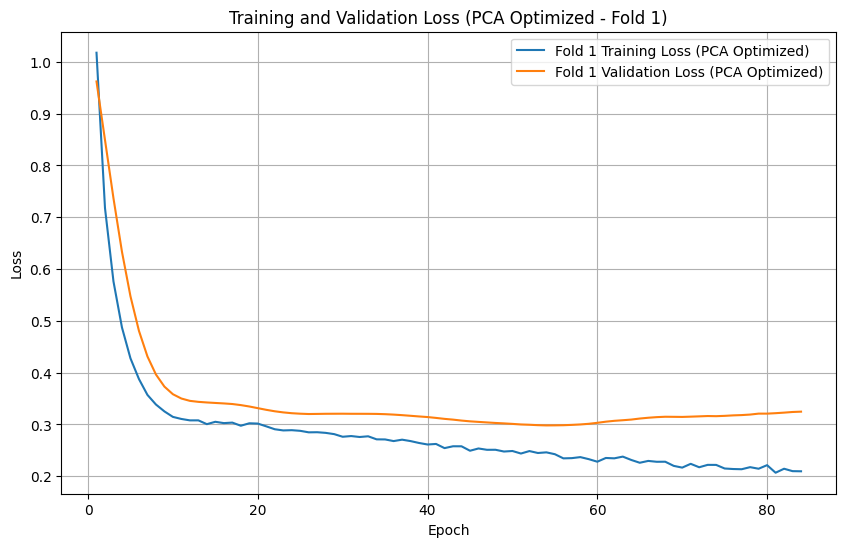

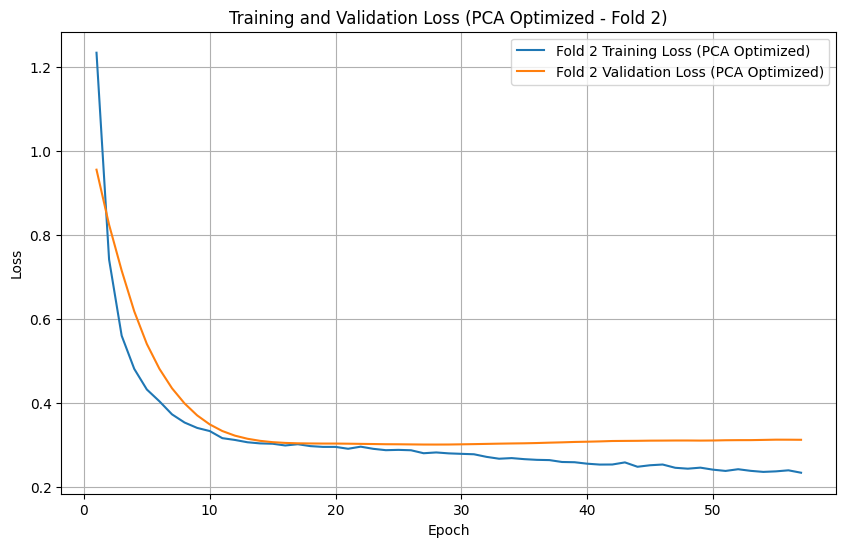

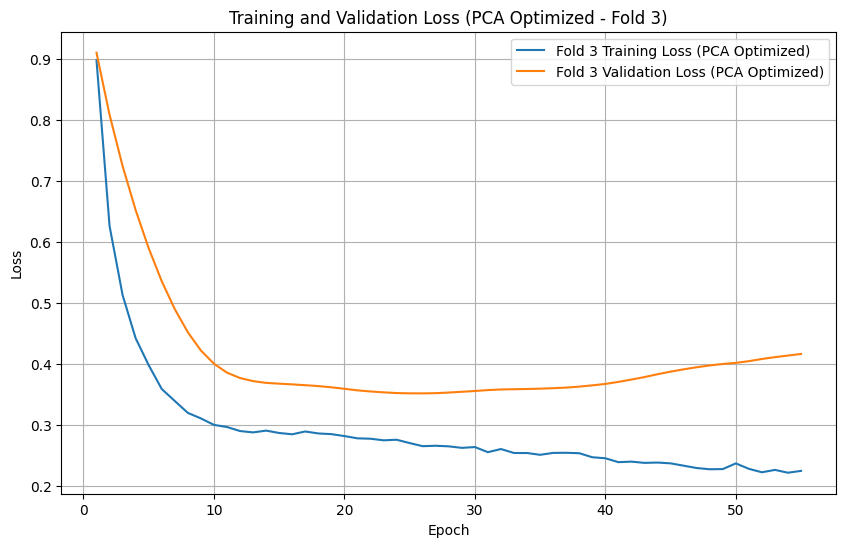

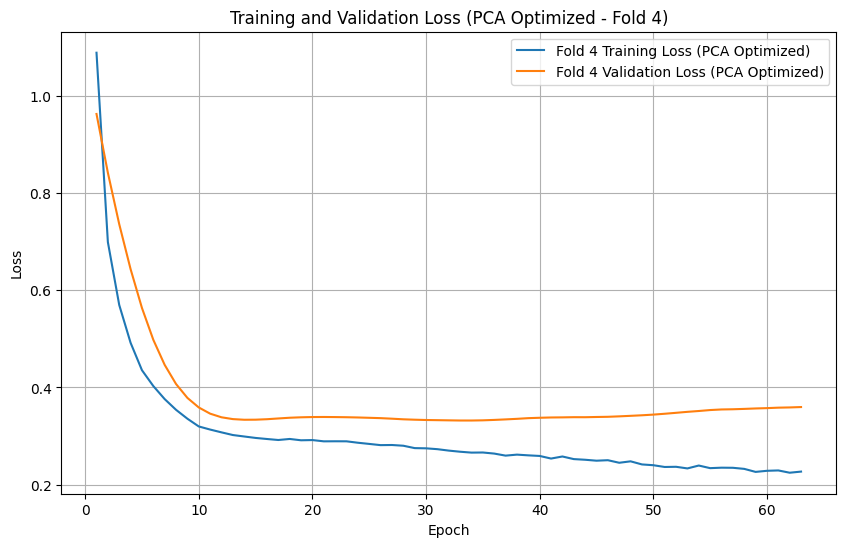

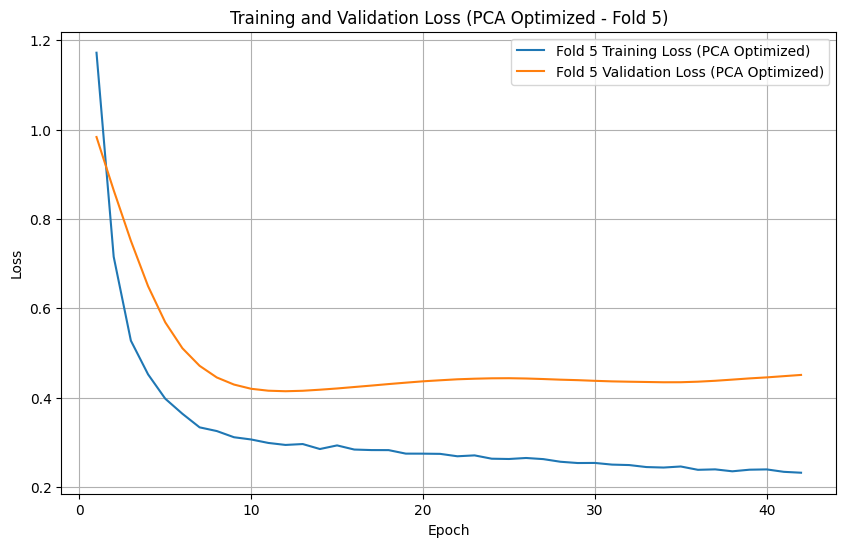

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import copy # Needed for EarlyStopping
import random

# Ensure reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Data preparation (assuming X_pca_tensor and y_tensor are available from previous steps)
X_pca_tensor = torch.tensor(X_pca, dtype=torch.float32) # Assuming X_pca is available from previous PCA step
y_tensor = torch.tensor(y, dtype=torch.long) # Assuming y is available from previous data loading step


# Hyperparameters (using the best found from random search for PCA model)
best_hyperparameters_pca = {'lr': 0.01, 'weight_decay': 0.0001, 'dropout_p': 0.1} # Update with the actual best hyperparameters if needed

input_size_pca = X_pca_tensor.shape[1]
num_classes = len(np.unique(y))
num_epochs = 500 # Max epochs, early stopping will stop earlier
k_folds = 5
patience = 30
min_delta = 1e-4
label_smoothing = 0.05

kfold = KFold(n_splits=k_folds, shuffle=True, random_state=seed)
fold_results_pca_optimized = {}

print(f"Starting K-Fold Cross-Validation with best PCA hyperparameters: {best_hyperparameters_pca}")
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_pca_tensor, y_tensor)):
    print(f'\n--- Fold {fold+1}/{k_folds} ---')

    X_train_pca, X_val_pca = X_pca_tensor[train_idx], X_pca_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # Initialize fresh model each fold with PCA input size and best hyperparameters
    model = StressPredictor(input_size_pca, num_classes, p_drop=best_hyperparameters_pca['dropout_p'])
    criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
    optimizer = optim.Adam(model.parameters(), lr=best_hyperparameters_pca['lr'], weight_decay=best_hyperparameters_pca['weight_decay'])

    early = EarlyStopping(patience=patience, min_delta=min_delta)

    train_losses, val_losses = [], []
    actual_epochs = 0

    for epoch in range(num_epochs):
        # ---- Train ----
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_pca)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # ---- Validate ----
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_pca)
            val_loss = criterion(val_outputs, y_val).item()
        val_losses.append(val_loss)

        actual_epochs = epoch + 1
        if (epoch + 1) % 50 == 0:
            print(f'Epoch {epoch+1:4d}: Train {loss.item():.4f} | Val {val_loss:.4f}')

        # ---- Early stopping check ----
        if early.step(val_loss, model):
            print(f'>> Early stopping at epoch {epoch+1} (best val loss: {early.best:.4f})')
            break

    # restore best weights before evaluation
    early.restore_best(model)

    # ---- Evaluate on this fold ----
    model.eval()
    with torch.no_grad():
        logits = model(X_val_pca)
        _, predicted = torch.max(logits, 1)
        accuracy = (predicted == y_val).float().mean().item() * 100
        print(f'Accuracy on validation set (fold {fold+1}): {accuracy:.2f}%')

    fold_results_pca_optimized[fold] = {
        'accuracy': accuracy,
        'train_losses': train_losses[:actual_epochs],
        'val_losses': val_losses[:actual_epochs],
        'epochs_run': actual_epochs
    }

# ===== Report CV accuracy =====
average_accuracy_pca_optimized = np.mean([res['accuracy'] for res in fold_results_pca_optimized.values()])
print(f'\nAverage cross-validation accuracy with best PCA hyperparameters: {average_accuracy_pca_optimized:.2f}%')

# ===== Plot per-fold curves (actual epochs used) =====
for fold, results in fold_results_pca_optimized.items():
    epochs = range(1, results['epochs_run'] + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, results['train_losses'], label=f'Fold {fold+1} Training Loss (PCA Optimized)')
    plt.plot(epochs, results['val_losses'], label=f'Fold {fold+1} Validation Loss (PCA Optimized)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss (PCA Optimized - Fold {fold+1})')
    plt.legend()
    plt.grid(True)
    plt.show()

These graphs look way better with minimal overfitting


Starting final PCA model training on the full training dataset...
Final PCA Training Epoch [50/500], Train Loss: 0.2211, Val Loss: 0.4087, Train Acc: 0.9815, Val Acc: 0.9040
>> Early stopping at epoch 50 (best val loss: 0.3523)

Final PCA model training finished.

Neural Network PCA Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9428    0.9430    0.9428    0.9457    0.9958
Test          0.9192    0.9191    0.9192    0.9220    0.9916

Cross-validation Accuracy (mean): 0.8939
Cross-validation Accuracy (std): 0.0115

Accuracy on the test data with PCA: 0.9192

Classification Report with PCA:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.97      0.86      0.91        66
           2       0.88      0.95      0.91        76

    accuracy                           0.92       198
   macro avg  

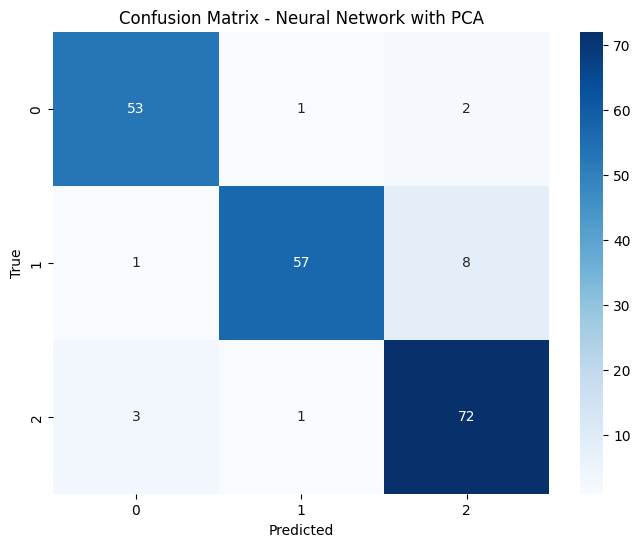


PCA evaluation results stored in 'evaluation_results_pca' list.
Total PCA configurations evaluated: 1
PCA reduced features from original to 12 components


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.base import BaseEstimator, ClassifierMixin
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import copy

# Initialize evaluation results list for PCA model
evaluation_results_pca_90 = []

# Assuming X_pca_tensor and y_tensor are available from previous steps

# Split data into training + validation and test sets using PCA-transformed data
X_train_val_pca, X_test_pca, y_train_val, y_test = train_test_split(X_pca_tensor, y_tensor, test_size=0.2, random_state=42)

# Split the training + validation set into training and validation sets
X_train_final_pca, X_val_final_pca, y_train_final, y_val_final = train_test_split(X_train_val_pca, y_train_val, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2 of original data for validation

# Re-train the model on the full training data before evaluating on the test set
input_size_pca = X_pca_tensor.shape[1] # Use the number of components from PCA
num_classes = len(np.unique(y_tensor))
# Use the best hyperparameters found for the PCA model
learning_rate = best_hyperparameters_pca['lr']
weight_decay = best_hyperparameters_pca['weight_decay']
dropout_p = best_hyperparameters_pca['dropout_p']
label_smoothing = 0.05 # Using the previously determined label smoothing

model_final_pca = StressPredictor(input_size_pca, num_classes, p_drop=dropout_p)
criterion_final_pca = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
optimizer_final_pca = optim.Adam(model_final_pca.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Add Early Stopping
patience = 30 # Using the previously determined patience
min_delta = 1e-4 # Using the previously determined min_delta
early_stopping_final_pca = EarlyStopping(patience=patience, min_delta=min_delta)

# Track losses and accuracies for plotting
train_losses_final_pca = []
val_losses_final_pca = []
train_accuracies_final_pca = []
val_accuracies_final_pca = []
epochs_run_final_pca = 0

# Train the model on the entire training data with early stopping
num_epochs_final_train = 500 # Set a higher number of epochs as early stopping will stop training

print("\nStarting final PCA model training on the full training dataset...")
for epoch in range(num_epochs_final_train):
    # Training
    model_final_pca.train()
    optimizer_final_pca.zero_grad()
    outputs_final_pca = model_final_pca(X_train_final_pca)
    loss_final_pca = criterion_final_pca(outputs_final_pca, y_train_final)
    loss_final_pca.backward()
    optimizer_final_pca.step()
    train_losses_final_pca.append(loss_final_pca.item())

    # Calculate training accuracy
    _, predicted_train_pca = torch.max(outputs_final_pca.data, 1)
    train_accuracy_pca = (predicted_train_pca == y_train_final).float().mean().item()
    train_accuracies_final_pca.append(train_accuracy_pca)

    # Validation (used for early stopping)
    model_final_pca.eval()
    with torch.no_grad():
        val_outputs_final_pca = model_final_pca(X_val_final_pca)
        val_loss_final_pca = criterion_final_pca(val_outputs_final_pca, y_val_final).item()
    val_losses_final_pca.append(val_loss_final_pca)

    # Calculate validation accuracy
    _, predicted_val_pca = torch.max(val_outputs_final_pca.data, 1)
    val_accuracy_pca = (predicted_val_pca == y_val_final).float().mean().item()
    val_accuracies_final_pca.append(val_accuracy_pca)

    epochs_run_final_pca = epoch + 1

    if (epoch + 1) % 50 == 0:
        print(f'Final PCA Training Epoch [{epoch+1}/{num_epochs_final_train}], Train Loss: {loss_final_pca.item():.4f}, Val Loss: {val_loss_final_pca:.4f}, Train Acc: {train_accuracy_pca:.4f}, Val Acc: {val_accuracy_pca:.4f}')

    # Early stopping check (based on validation loss)
    if early_stopping_final_pca.step(val_loss_final_pca, model_final_pca):
        print(f'>> Early stopping at epoch {epoch+1} (best val loss: {early_stopping_final_pca.best:.4f})')
        break

# Restore best weights before evaluating on the test set
early_stopping_final_pca.restore_best(model_final_pca)

print("\nFinal PCA model training finished.")

# Comprehensive Evaluation
model_final_pca.eval()
with torch.no_grad():
    # Training set predictions
    train_outputs_pca = model_final_pca(X_train_final_pca)
    _, train_predicted_pca = torch.max(train_outputs_pca.data, 1)
    train_proba_pca = torch.softmax(train_outputs_pca, dim=1)

    # Test set predictions
    test_outputs_pca = model_final_pca(X_test_pca)
    _, test_predicted_pca = torch.max(test_outputs_pca.data, 1)
    test_proba_pca = torch.softmax(test_outputs_pca, dim=1)

# Convert tensors to numpy arrays for sklearn metrics
y_train_true_pca = y_train_final.numpy()
y_train_pred_pca = train_predicted_pca.numpy()
y_train_proba_pca = train_proba_pca.numpy()

y_test_true_pca = y_test.numpy()
y_test_pred_pca = test_predicted_pca.numpy()
y_test_proba_pca = test_proba_pca.numpy()

# Calculate training metrics
train_accuracy_pca_final = accuracy_score(y_train_true_pca, y_train_pred_pca)
train_f1_pca = f1_score(y_train_true_pca, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train_true_pca, y_train_pred_pca, average='weighted')
train_precision_pca = precision_score(y_train_true_pca, y_train_pred_pca, average='weighted')

# Calculate training AUC-ROC
try:
    if len(np.unique(y_train_true_pca)) == 2:
        train_auc_roc_pca = roc_auc_score(y_train_true_pca, y_train_proba_pca[:, 1])
    else:
        train_auc_roc_pca = roc_auc_score(y_train_true_pca, y_train_proba_pca, multi_class='ovr', average='weighted')
except Exception as e:
    print(f"Warning: Could not calculate training AUC-ROC for PCA model: {e}")
    train_auc_roc_pca = np.nan

# Calculate test metrics
test_accuracy_pca = accuracy_score(y_test_true_pca, y_test_pred_pca)
test_f1_pca = f1_score(y_test_true_pca, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test_true_pca, y_test_pred_pca, average='weighted')
test_precision_pca = precision_score(y_test_true_pca, y_test_pred_pca, average='weighted')

# Calculate test AUC-ROC
try:
    if len(np.unique(y_test_true_pca)) == 2:
        test_auc_roc_pca = roc_auc_score(y_test_true_pca, y_test_proba_pca[:, 1])
    else:
        test_auc_roc_pca = roc_auc_score(y_test_true_pca, y_test_proba_pca, multi_class='ovr', average='weighted')
except Exception as e:
    print(f"Warning: Could not calculate test AUC-ROC for PCA model: {e}")
    test_auc_roc_pca = np.nan

# Cross-validation for PCA model
class PyTorchPCAClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, num_classes, dropout_p, lr, weight_decay, patience=30, min_delta=1e-4, max_epochs=500):
        self.input_size = input_size
        self.num_classes = num_classes
        self.dropout_p = dropout_p
        self.lr = lr
        self.weight_decay = weight_decay
        self.patience = patience
        self.min_delta = min_delta
        self.max_epochs = max_epochs
        self.model = None

    def fit(self, X, y):
        # Convert to tensors if not already
        if not isinstance(X, torch.Tensor):
            X_tensor = torch.FloatTensor(X)
        else:
            X_tensor = X

        if not isinstance(y, torch.Tensor):
            y_tensor = torch.LongTensor(y)
        else:
            y_tensor = y

        # Initialize model
        self.model = StressPredictor(self.input_size, self.num_classes, p_drop=self.dropout_p)
        criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay)
        early_stopping = EarlyStopping(patience=self.patience, min_delta=self.min_delta)

        # Simple training loop (without validation split for CV)
        for epoch in range(self.max_epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

            if early_stopping.step(loss.item(), self.model):
                break

        early_stopping.restore_best(self.model)
        return self

    def predict(self, X):
        if not isinstance(X, torch.Tensor):
            X_tensor = torch.FloatTensor(X)
        else:
            X_tensor = X

        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs.data, 1)
        return predicted.numpy()

# Perform cross-validation for PCA model
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sklearn_model_pca = PyTorchPCAClassifier(
    input_size=input_size_pca,
    num_classes=num_classes,
    dropout_p=dropout_p,
    lr=learning_rate,
    weight_decay=weight_decay
)

# Convert training data to numpy for cross-validation
X_train_pca_np = X_train_final_pca.numpy()
y_train_pca_np = y_train_final.numpy()

cv_scores_pca = cross_val_score(sklearn_model_pca, X_train_pca_np, y_train_pca_np, cv=cv_stratified, scoring='accuracy')

# Display results
print("\nNeural Network PCA Model Performance Metrics")
print(f"{'Dataset':<10}{'Accuracy':>10}{'F1 Score':>10}{'Recall':>10}{'Precision':>10}{'AUC-ROC':>10}")
print("-" * 60)
print(f"{'Training':<10}{train_accuracy_pca_final:>10.4f}{train_f1_pca:>10.4f}{train_recall_pca:>10.4f}{train_precision_pca:>10.4f}{train_auc_roc_pca:>10.4f}")
print(f"{'Test':<10}{test_accuracy_pca:>10.4f}{test_f1_pca:>10.4f}{test_recall_pca:>10.4f}{test_precision_pca:>10.4f}{test_auc_roc_pca:>10.4f}")

print(f"\nCross-validation Accuracy (mean): {cv_scores_pca.mean():.4f}")
print(f"Cross-validation Accuracy (std): {cv_scores_pca.std():.4f}")

print(f'\nAccuracy on the test data with PCA: {test_accuracy_pca:.4f}')

print("\nClassification Report with PCA:")
print(classification_report(y_test_true_pca, y_test_pred_pca))

# Store detailed results for the summary table
evaluation_results_pca_90.append({
    'Configuration': 'Neural Network PCA (90% variance)',
    'Train Accuracy': train_accuracy_pca_final,
    'Train F1 Score': train_f1_pca,
    'Train Recall': train_recall_pca,
    'Train Precision': train_precision_pca,
    'Train AUC-ROC': train_auc_roc_pca,
    'Test Accuracy': test_accuracy_pca,
    'Test F1 Score': test_f1_pca,
    'Test Recall': test_recall_pca,
    'Test Precision': test_precision_pca,
    'Test AUC-ROC': test_auc_roc_pca,
    'CV Mean Accuracy': cv_scores_pca.mean(),
    'CV Std Accuracy': cv_scores_pca.std(),
    'Best Hyperparameters': best_hyperparameters_pca,
    'Epochs Run': epochs_run_final_pca,
    'PCA Components': input_size_pca
})

# Generate and display confusion matrix
cm_pca = confusion_matrix(y_test_true_pca, y_test_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Neural Network with PCA')
plt.show()

print(f"\nPCA evaluation results stored in 'evaluation_results_pca' list.")
print(f"Total PCA configurations evaluated: {len(evaluation_results_pca_90)}")
print(f"PCA reduced features from original to {input_size_pca} components")

## Neural Network with PCA 95

Let’s now use the model with PCA 95. And experiment with the hyperparameters and see if we can make the model almost free of overfitting.

(It may reduce the accuracy of the model)

learning_rate = 0.001

dropout precentage = 0.3

weight_decay = 0

Original number of features: 20
Number of features after PCA (retaining 95% variance): 15
--- Fold 1/5 ---
Epoch [100/500], Train Loss: 0.2113, Val Loss: 0.1930
>> Early stopping at epoch 190 (best val loss: 0.1790)
Accuracy on validation set for fold 1: 90.91%
--- Fold 2/5 ---
Epoch [100/500], Train Loss: 0.2162, Val Loss: 0.1736
Epoch [200/500], Train Loss: 0.1436, Val Loss: 0.1538
>> Early stopping at epoch 216 (best val loss: 0.1528)
Accuracy on validation set for fold 2: 92.42%
--- Fold 3/5 ---
Epoch [100/500], Train Loss: 0.1999, Val Loss: 0.2365
>> Early stopping at epoch 155 (best val loss: 0.2337)
Accuracy on validation set for fold 3: 89.90%
--- Fold 4/5 ---
Epoch [100/500], Train Loss: 0.2402, Val Loss: 0.2610
Epoch [200/500], Train Loss: 0.1546, Val Loss: 0.2378
>> Early stopping at epoch 212 (best val loss: 0.2350)
Accuracy on validation set for fold 4: 89.90%
--- Fold 5/5 ---
Epoch [100/500], Train Loss: 0.1997, Val Loss: 0.2330
>> Early stopping at epoch 166 (best val lo

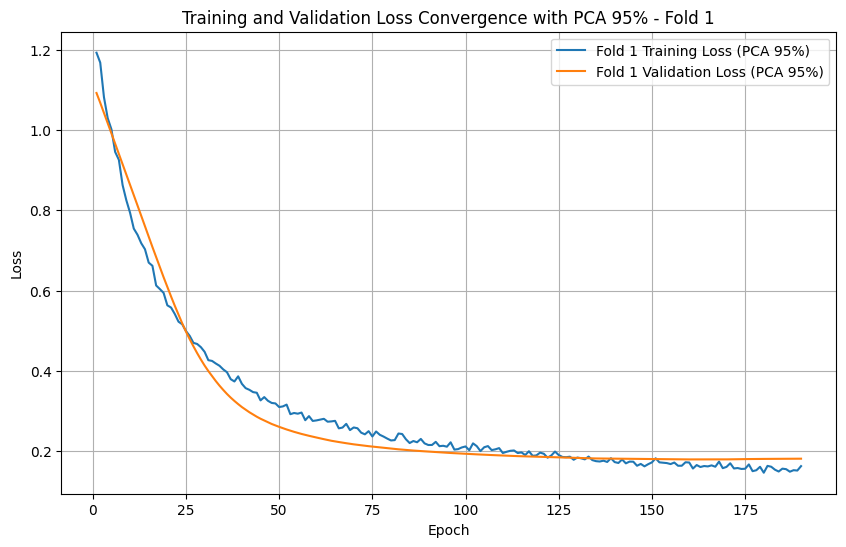

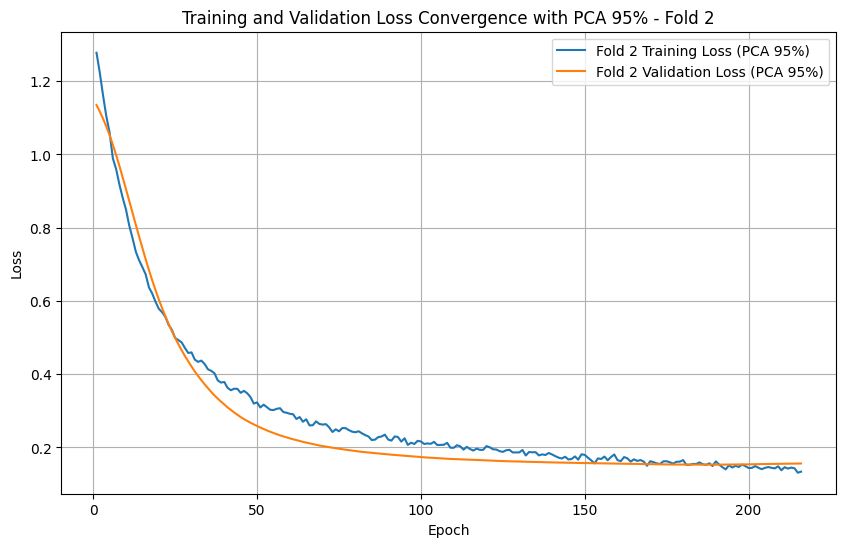

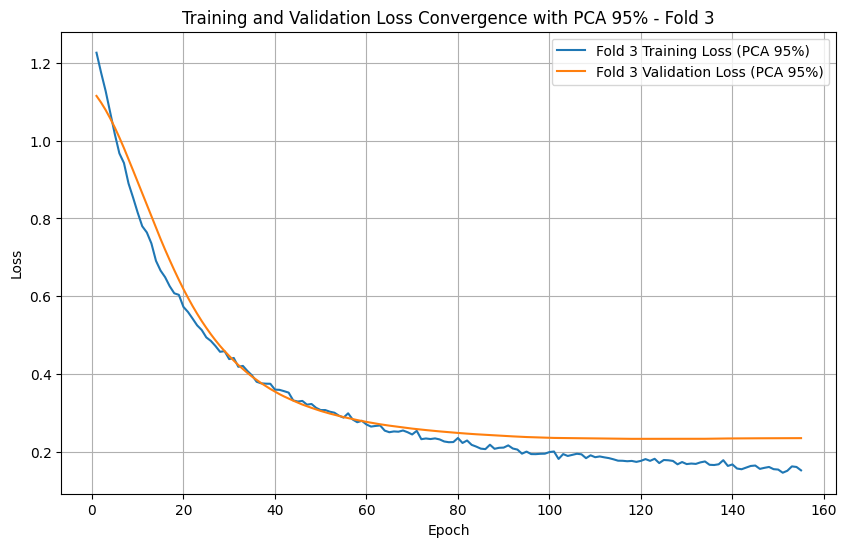

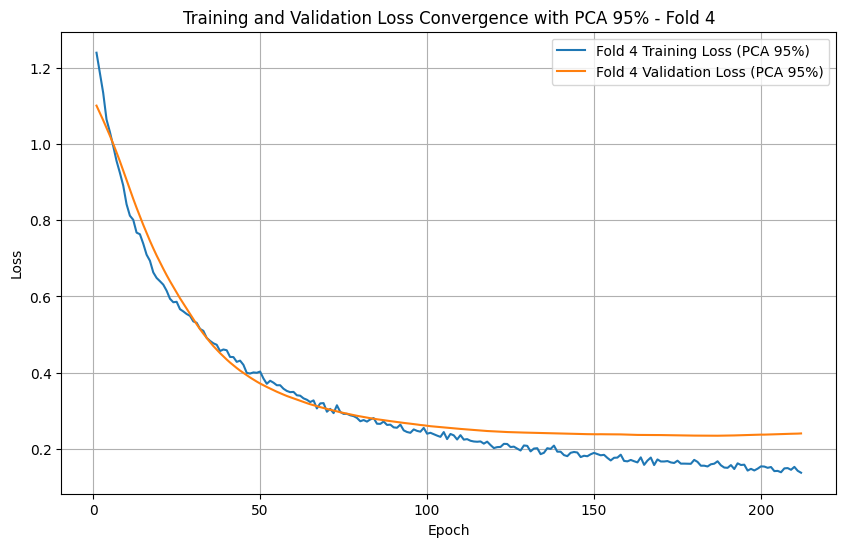

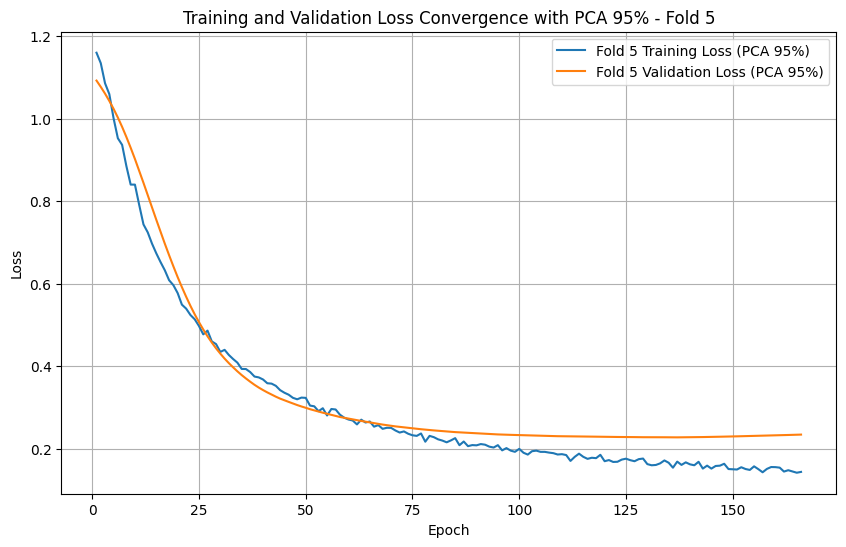

In [ ]:
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import copy

# Apply PCA, retaining 95% of the variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print("="*60)
print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Number of features after PCA (retaining 95% variance): {X_pca_95.shape[1]}")
print("="*60)
# Convert PCA-transformed data to PyTorch tensor
X_pca_95_tensor = torch.tensor(X_pca_95, dtype=torch.float32)

# Set hyperparameters
input_size_pca_95 = X_pca_95_tensor.shape[1] # Use the number of components from PCA
num_classes = len(np.unique(y))
learning_rate = 0.001
p_drop=0.3
weight_decay = 0
num_epochs = 500 # Increase epochs as early stopping will prevent overfitting
k_folds = 5 # Number of folds for cross-validation
patience = 30 # Early stopping patience
min_delta = 1e-4 # Early stopping minimum delta

# Implement K-Fold Cross-Validation
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_results_pca_95 = {}

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_pca_95_tensor, y_tensor)):
    print(f'--- Fold {fold+1}/{k_folds} ---')

    X_train_pca_95, X_val_pca_95 = X_pca_95_tensor[train_idx], X_pca_95_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # Initialize the model, loss function, and optimizer for each fold using PCA input size
    model_pca_95 = StressPredictor(input_size_pca_95, num_classes, p_drop=0.3)
    criterion_pca_95 = nn.CrossEntropyLoss()
    optimizer_pca_95 = optim.Adam(model_pca_95.parameters(), lr=0.001)

    # Initialize Early Stopping
    early_stopping_pca_95 = EarlyStopping(patience=patience, min_delta=min_delta)

    train_losses_pca_95 = []
    val_losses_pca_95 = []
    epochs_run_pca_95 = 0

    # Training loop for the current fold
    for epoch in range(num_epochs):
        # Training
        model_pca_95.train() # Set model to training mode
        optimizer_pca_95.zero_grad()
        outputs_pca_95 = model_pca_95(X_train_pca_95)
        loss_pca_95 = criterion_pca_95(outputs_pca_95, y_train)
        loss_pca_95.backward()
        optimizer_pca_95.step()
        train_losses_pca_95.append(loss_pca_95.item())

        # Validation
        model_pca_95.eval() # Set model to evaluation mode
        with torch.no_grad():
            val_outputs_pca_95 = model_pca_95(X_val_pca_95)
            val_loss_pca_95 = criterion_pca_95(val_outputs_pca_95, y_val)
            val_losses_pca_95.append(val_loss_pca_95.item())

        epochs_run_pca_95 = epoch + 1

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss_pca_95.item():.4f}, Val Loss: {val_loss_pca_95.item():.4f}')

        # Early stopping check
        if early_stopping_pca_95.step(val_loss_pca_95.item(), model_pca_95):
            print(f'>> Early stopping at epoch {epoch+1} (best val loss: {early_stopping_pca_95.best:.4f})')
            break


    # Evaluate the model on the validation set of the current fold
    early_stopping_pca_95.restore_best(model_pca_95) # Restore best weights
    model_pca_95.eval()
    with torch.no_grad():
        val_outputs_pca_95 = model_pca_95(X_val_pca_95)
        _, predicted_pca_95 = torch.max(val_outputs_pca_95.data, 1)
        total = y_val.size(0)
        correct = (predicted_pca_95 == y_val).sum().item()
        accuracy_pca_95 = 100 * correct / total
        print(f'Accuracy on validation set for fold {fold+1}: {accuracy_pca_95:.2f}%')

    fold_results_pca_95[fold] = {'accuracy': accuracy_pca_95, 'train_losses': train_losses_pca_95[:epochs_run_pca_95], 'val_losses': val_losses_pca_95[:epochs_run_pca_95], 'epochs_run': epochs_run_pca_95}

# Report average cross-validation accuracy
average_accuracy_pca_95 = np.mean([res['accuracy'] for res in fold_results_pca_95.values()])
print(f'\nAverage cross-validation accuracy with PCA 95%: {average_accuracy_pca_95:.2f}%')

# Plot training and validation convergence for each fold
for fold, results in fold_results_pca_95.items():
    epochs = range(1, results['epochs_run'] + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, results['train_losses'], linestyle='-', label=f'Fold {fold+1} Training Loss (PCA 95%)')
    plt.plot(epochs, results['val_losses'], linestyle='-', label=f'Fold {fold+1} Validation Loss (PCA 95%)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss Convergence with PCA 95% - Fold {fold+1}')
    plt.legend()
    plt.grid(True)
    plt.show()


Starting final PCA 95% model training on the full training dataset...
Final PCA 95% Training Epoch [50/500], Train Loss: 0.4043, Val Loss: 0.3957, Train Acc: 0.9158, Val Acc: 0.8939
Final PCA 95% Training Epoch [100/500], Train Loss: 0.3142, Val Loss: 0.3497, Train Acc: 0.9411, Val Acc: 0.8788
>> Early stopping at epoch 125 (best val loss: 0.3494)

Final PCA 95% model training finished.

Neural Network PCA 95% Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9512    0.9515    0.9512    0.9535    0.9963
Test          0.9242    0.9245    0.9242    0.9277    0.9923

Cross-validation Accuracy (mean): 0.8940
Cross-validation Accuracy (std): 0.0112

Accuracy on the test data with PCA 95%: 0.9242

Classification Report with PCA 95%:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.98      0.88      

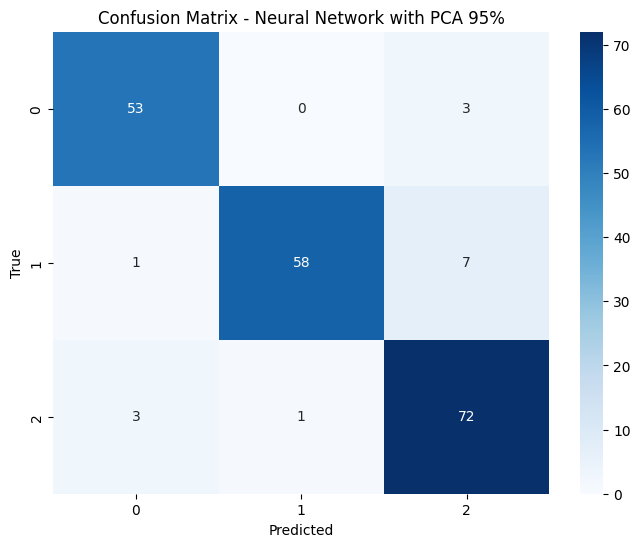


PCA 95% evaluation results stored in 'evaluation_results_pca_95' list.
Total PCA 95% configurations evaluated: 1
PCA 95% reduced features from original to 15 components
Cross-validation accuracy from previous K-fold results: 0.9061


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.base import BaseEstimator, ClassifierMixin
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import copy

# Initialize evaluation results list for PCA 95% model
evaluation_results_pca_95 = []

# Assuming X_pca_95_tensor and y_tensor are available from previous steps

# Split data into training + validation and test sets using PCA-transformed data
X_train_val_pca_95, X_test_pca_95, y_train_val, y_test = train_test_split(X_pca_95_tensor, y_tensor, test_size=0.2, random_state=42)

# Split the training + validation set into training and validation sets
X_train_final_pca_95, X_val_final_pca_95, y_train_final, y_val_final = train_test_split(X_train_val_pca_95, y_train_val, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2 of original data for validation

# Re-train the model on the full training data before evaluating on the test set
input_size_pca_95 = X_pca_95_tensor.shape[1] # Use the number of components from PCA
num_classes = len(np.unique(y_tensor))
learning_rate = 0.001 # Using the previously determined learning rate
weight_decay = 0 # Using the previously determined weight decay
dropout_p = 0.3 # Using the previously determined dropout
label_smoothing = 0.05 # Using the previously determined label smoothing

model_final_pca_95 = StressPredictor(input_size_pca_95, num_classes, p_drop=dropout_p)
criterion_final_pca_95 = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
optimizer_final_pca_95 = optim.Adam(model_final_pca_95.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Add Early Stopping
patience = 30 # Using the previously determined patience
min_delta = 1e-4 # Using the previously determined min_delta
early_stopping_final_pca_95 = EarlyStopping(patience=patience, min_delta=min_delta)

# Track losses and accuracies for plotting
train_losses_final_pca_95 = []
val_losses_final_pca_95 = []
train_accuracies_final_pca_95 = []
val_accuracies_final_pca_95 = []
epochs_run_final_pca_95 = 0

# Train the model on the entire training data with early stopping
num_epochs_final_train = 500 # Set a higher number of epochs as early stopping will stop training

print("\nStarting final PCA 95% model training on the full training dataset...")
for epoch in range(num_epochs_final_train):
    # Training
    model_final_pca_95.train()
    optimizer_final_pca_95.zero_grad()
    outputs_final_pca_95 = model_final_pca_95(X_train_final_pca_95)
    loss_final_pca_95 = criterion_final_pca_95(outputs_final_pca_95, y_train_final)
    loss_final_pca_95.backward()
    optimizer_final_pca_95.step()
    train_losses_final_pca_95.append(loss_final_pca_95.item())

    # Calculate training accuracy
    _, predicted_train_pca_95 = torch.max(outputs_final_pca_95.data, 1)
    train_accuracy_pca_95 = (predicted_train_pca_95 == y_train_final).float().mean().item()
    train_accuracies_final_pca_95.append(train_accuracy_pca_95)

    # Validation (used for early stopping)
    model_final_pca_95.eval()
    with torch.no_grad():
        val_outputs_final_pca_95 = model_final_pca_95(X_val_final_pca_95)
        val_loss_final_pca_95 = criterion_final_pca_95(val_outputs_final_pca_95, y_val_final).item()
    val_losses_final_pca_95.append(val_loss_final_pca_95)

    # Calculate validation accuracy
    _, predicted_val_pca_95 = torch.max(val_outputs_final_pca_95.data, 1)
    val_accuracy_pca_95 = (predicted_val_pca_95 == y_val_final).float().mean().item()
    val_accuracies_final_pca_95.append(val_accuracy_pca_95)

    epochs_run_final_pca_95 = epoch + 1

    if (epoch + 1) % 50 == 0:
        print(f'Final PCA 95% Training Epoch [{epoch+1}/{num_epochs_final_train}], Train Loss: {loss_final_pca_95.item():.4f}, Val Loss: {val_loss_final_pca_95:.4f}, Train Acc: {train_accuracy_pca_95:.4f}, Val Acc: {val_accuracy_pca_95:.4f}')

    # Early stopping check (based on validation loss)
    if early_stopping_final_pca_95.step(val_loss_final_pca_95, model_final_pca_95):
        print(f'>> Early stopping at epoch {epoch+1} (best val loss: {early_stopping_final_pca_95.best:.4f})')
        break

# Restore best weights before evaluating on the test set
early_stopping_final_pca_95.restore_best(model_final_pca_95)

print("\nFinal PCA 95% model training finished.")

# Comprehensive Evaluation
model_final_pca_95.eval()
with torch.no_grad():
    # Training set predictions
    train_outputs_pca_95 = model_final_pca_95(X_train_final_pca_95)
    _, train_predicted_pca_95 = torch.max(train_outputs_pca_95.data, 1)
    train_proba_pca_95 = torch.softmax(train_outputs_pca_95, dim=1)

    # Test set predictions
    test_outputs_pca_95 = model_final_pca_95(X_test_pca_95)
    _, test_predicted_pca_95 = torch.max(test_outputs_pca_95.data, 1)
    test_proba_pca_95 = torch.softmax(test_outputs_pca_95, dim=1)

# Convert tensors to numpy arrays for sklearn metrics
y_train_true_pca_95 = y_train_final.numpy()
y_train_pred_pca_95 = train_predicted_pca_95.numpy()
y_train_proba_pca_95 = train_proba_pca_95.numpy()

y_test_true_pca_95 = y_test.numpy()
y_test_pred_pca_95 = test_predicted_pca_95.numpy()
y_test_proba_pca_95 = test_proba_pca_95.numpy()

# Calculate training metrics
train_accuracy_pca_95_final = accuracy_score(y_train_true_pca_95, y_train_pred_pca_95)
train_f1_pca_95 = f1_score(y_train_true_pca_95, y_train_pred_pca_95, average='weighted')
train_recall_pca_95 = recall_score(y_train_true_pca_95, y_train_pred_pca_95, average='weighted')
train_precision_pca_95 = precision_score(y_train_true_pca_95, y_train_pred_pca_95, average='weighted')

# Calculate training AUC-ROC
try:
    if len(np.unique(y_train_true_pca_95)) == 2:
        train_auc_roc_pca_95 = roc_auc_score(y_train_true_pca_95, y_train_proba_pca_95[:, 1])
    else:
        train_auc_roc_pca_95 = roc_auc_score(y_train_true_pca_95, y_train_proba_pca_95, multi_class='ovr', average='weighted')
except Exception as e:
    print(f"Warning: Could not calculate training AUC-ROC for PCA 95% model: {e}")
    train_auc_roc_pca_95 = np.nan

# Calculate test metrics
test_accuracy_pca_95 = accuracy_score(y_test_true_pca_95, y_test_pred_pca_95)
test_f1_pca_95 = f1_score(y_test_true_pca_95, y_test_pred_pca_95, average='weighted')
test_recall_pca_95 = recall_score(y_test_true_pca_95, y_test_pred_pca_95, average='weighted')
test_precision_pca_95 = precision_score(y_test_true_pca_95, y_test_pred_pca_95, average='weighted')

# Calculate test AUC-ROC
try:
    if len(np.unique(y_test_true_pca_95)) == 2:
        test_auc_roc_pca_95 = roc_auc_score(y_test_true_pca_95, y_test_proba_pca_95[:, 1])
    else:
        test_auc_roc_pca_95 = roc_auc_score(y_test_true_pca_95, y_test_proba_pca_95, multi_class='ovr', average='weighted')
except Exception as e:
    print(f"Warning: Could not calculate test AUC-ROC for PCA 95% model: {e}")
    test_auc_roc_pca_95 = np.nan

# Cross-validation for PCA 95% model
class PyTorchPCA95Classifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, num_classes, dropout_p, lr, weight_decay, patience=30, min_delta=1e-4, max_epochs=500):
        self.input_size = input_size
        self.num_classes = num_classes
        self.dropout_p = dropout_p
        self.lr = lr
        self.weight_decay = weight_decay
        self.patience = patience
        self.min_delta = min_delta
        self.max_epochs = max_epochs
        self.model = None

    def fit(self, X, y):
        # Convert to tensors if not already
        if not isinstance(X, torch.Tensor):
            X_tensor = torch.FloatTensor(X)
        else:
            X_tensor = X

        if not isinstance(y, torch.Tensor):
            y_tensor = torch.LongTensor(y)
        else:
            y_tensor = y

        # Initialize model
        self.model = StressPredictor(self.input_size, self.num_classes, p_drop=self.dropout_p)
        criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay)
        early_stopping = EarlyStopping(patience=self.patience, min_delta=self.min_delta)

        # Simple training loop (without validation split for CV)
        for epoch in range(self.max_epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

            if early_stopping.step(loss.item(), self.model):
                break

        early_stopping.restore_best(self.model)
        return self

    def predict(self, X):
        if not isinstance(X, torch.Tensor):
            X_tensor = torch.FloatTensor(X)
        else:
            X_tensor = X

        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs.data, 1)
        return predicted.numpy()

# Perform cross-validation for PCA 95% model
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sklearn_model_pca_95 = PyTorchPCA95Classifier(
    input_size=input_size_pca_95,
    num_classes=num_classes,
    dropout_p=dropout_p,
    lr=learning_rate,
    weight_decay=weight_decay
)

# Convert training data to numpy for cross-validation
X_train_pca_95_np = X_train_final_pca_95.numpy()
y_train_pca_95_np = y_train_final.numpy()

cv_scores_pca_95 = cross_val_score(sklearn_model_pca_95, X_train_pca_95_np, y_train_pca_95_np, cv=cv_stratified, scoring='accuracy')

# Display results
print("\nNeural Network PCA 95% Model Performance Metrics")
print(f"{'Dataset':<10}{'Accuracy':>10}{'F1 Score':>10}{'Recall':>10}{'Precision':>10}{'AUC-ROC':>10}")
print("-" * 60)
print(f"{'Training':<10}{train_accuracy_pca_95_final:>10.4f}{train_f1_pca_95:>10.4f}{train_recall_pca_95:>10.4f}{train_precision_pca_95:>10.4f}{train_auc_roc_pca_95:>10.4f}")
print(f"{'Test':<10}{test_accuracy_pca_95:>10.4f}{test_f1_pca_95:>10.4f}{test_recall_pca_95:>10.4f}{test_precision_pca_95:>10.4f}{test_auc_roc_pca_95:>10.4f}")

print(f"\nCross-validation Accuracy (mean): {cv_scores_pca_95.mean():.4f}")
print(f"Cross-validation Accuracy (std): {cv_scores_pca_95.std():.4f}")

print(f'\nAccuracy on the test data with PCA 95%: {test_accuracy_pca_95:.4f}')

print("\nClassification Report with PCA 95%:")
print(classification_report(y_test_true_pca_95, y_test_pred_pca_95))

# Store detailed results for the summary table
evaluation_results_pca_95.append({
    'Configuration': 'Neural Network PCA (95% variance)',
    'Train Accuracy': train_accuracy_pca_95_final,
    'Train F1 Score': train_f1_pca_95,
    'Train Recall': train_recall_pca_95,
    'Train Precision': train_precision_pca_95,
    'Train AUC-ROC': train_auc_roc_pca_95,
    'Test Accuracy': test_accuracy_pca_95,
    'Test F1 Score': test_f1_pca_95,
    'Test Recall': test_recall_pca_95,
    'Test Precision': test_precision_pca_95,
    'Test AUC-ROC': test_auc_roc_pca_95,
    'CV Mean Accuracy': cv_scores_pca_95.mean(),
    'CV Std Accuracy': cv_scores_pca_95.std(),
    'Hyperparameters': {
        'learning_rate': learning_rate,
        'weight_decay': weight_decay,
        'dropout_p': dropout_p,
        'label_smoothing': label_smoothing,
        'patience': patience
    },
    'Epochs Run': epochs_run_final_pca_95,
    'PCA Components': input_size_pca_95,
    'Variance Explained': '95%'
})

# Generate and display confusion matrix
cm_pca_95 = confusion_matrix(y_test_true_pca_95, y_test_pred_pca_95)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca_95, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Neural Network with PCA 95%')
plt.show()

print(f"\nPCA 95% evaluation results stored in 'evaluation_results_pca_95' list.")
print(f"Total PCA 95% configurations evaluated: {len(evaluation_results_pca_95)}")
print(f"PCA 95% reduced features from original to {input_size_pca_95} components")

# Optional: Use the cross-validation results from fold_results_pca_95 if available
try:
    if 'fold_results_pca_95' in locals():
        cv_accuracy_from_folds = np.mean([res['accuracy'] for res in fold_results_pca_95.values()]) / 100.0
        print(f"Cross-validation accuracy from previous K-fold results: {cv_accuracy_from_folds:.4f}")
        # Update the stored results with the K-fold CV accuracy if preferred
        evaluation_results_pca_95[-1]['CV Mean Accuracy (K-fold)'] = cv_accuracy_from_folds
except:
    pass

## XGBoost


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 19

=== RFECV Feature Selection with XGBoost ===
Optimal number of features selected by RFECV: 17

=== PCA Dimensionality Reduction ===
Number of components to retain 90% variance after normalization: 11

=== XGBoost Model Evaluation ===

Running XGBoost with Original Data configuration...
Training data shape: (792, 20)
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

XGBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      1.0000    1.0000    1.0000    1.0000    1.0000
Test          0.8939    0.8942    0.8939    0.8961    0.9865

Cross-validation Accuracy (mean): 0.9331


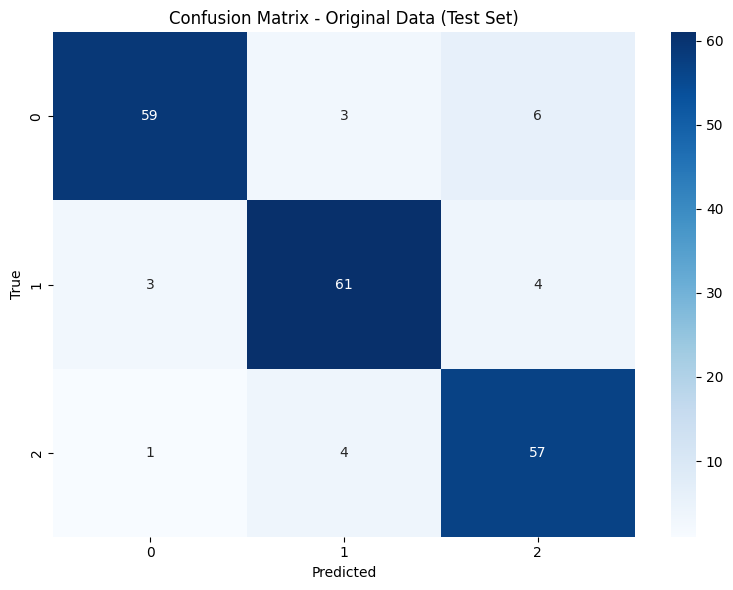


Running XGBoost with Normalized Data configuration...
Training data shape: (792, 20)
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

XGBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      1.0000    1.0000    1.0000    1.0000    1.0000
Test          0.8939    0.8942    0.8939    0.8961    0.9865

Cross-validation Accuracy (mean): 0.9331


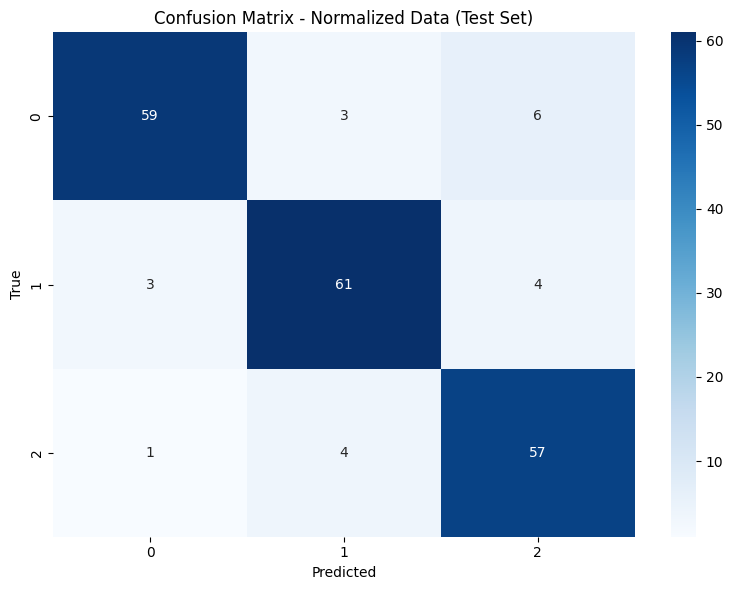


Running XGBoost with SelectKBest configuration...
Training data shape: (792, 19)
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

XGBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      1.0000    1.0000    1.0000    1.0000    1.0000
Test          0.8838    0.8839    0.8838    0.8844    0.9854

Cross-validation Accuracy (mean): 0.9331


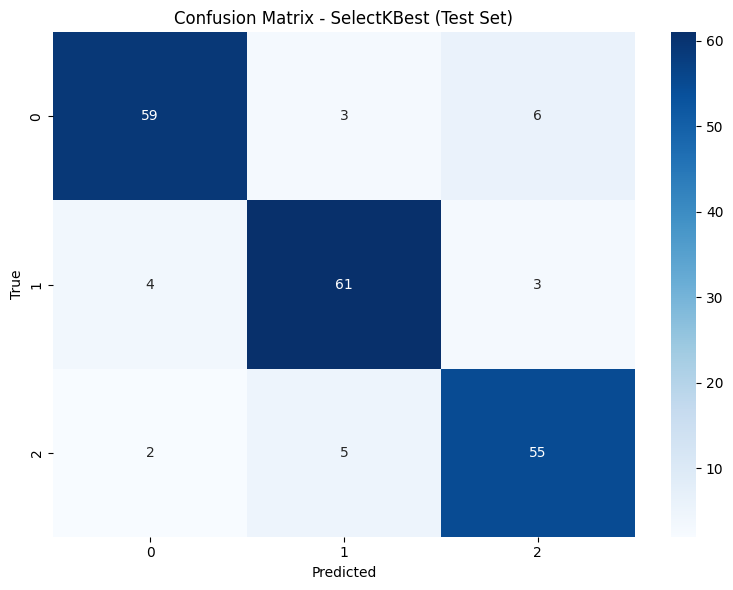


Running XGBoost with RFECV configuration...
Training data shape: (792, 17)
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

XGBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      1.0000    1.0000    1.0000    1.0000    1.0000
Test          0.8889    0.8892    0.8889    0.8916    0.9857

Cross-validation Accuracy (mean): 0.9369


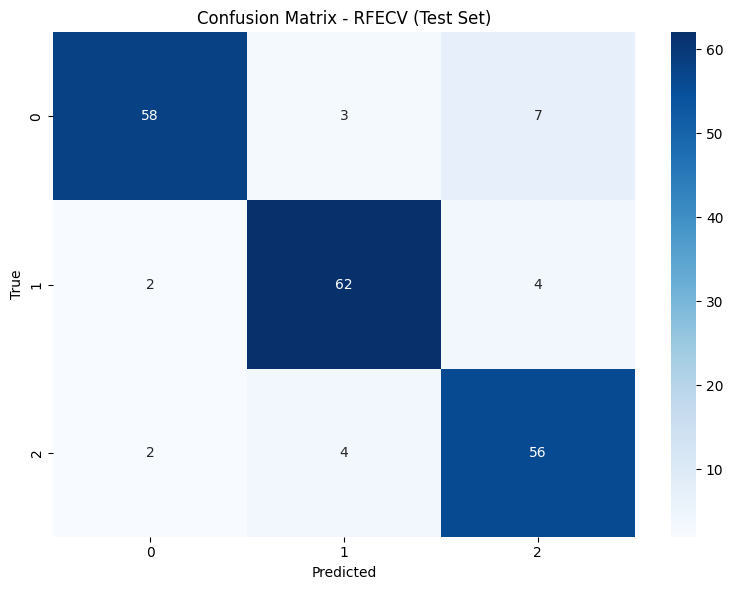


Running XGBoost with PCA configuration...
Training data shape: (792, 11)
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

XGBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      1.0000    1.0000    1.0000    1.0000    1.0000
Test          0.8838    0.8832    0.8838    0.8836    0.9863

Cross-validation Accuracy (mean): 0.9192


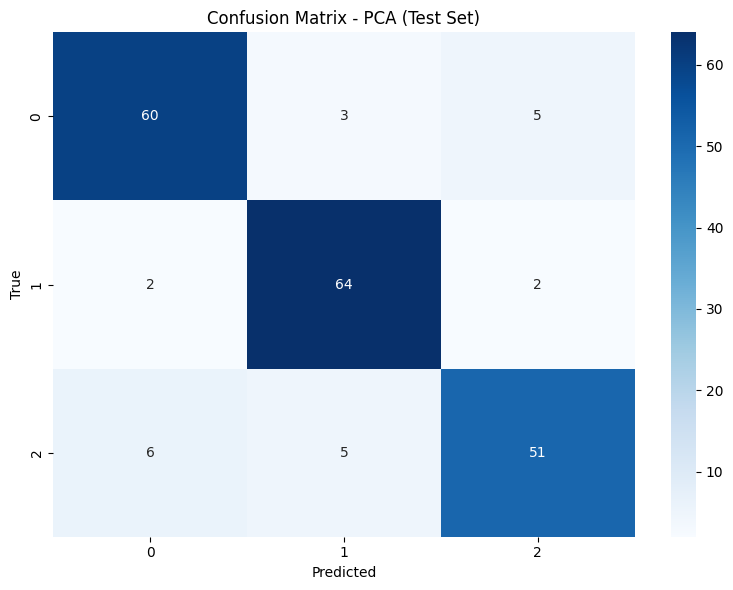


SUMMARY OF ALL CONFIGURATIONS
     Configuration  Test Accuracy  Test F1 Score  CV Mean Accuracy
0    Original Data         0.8939         0.8942            0.9331
1  Normalized Data         0.8939         0.8942            0.9331
2      SelectKBest         0.8838         0.8839            0.9331
3            RFECV         0.8889         0.8892            0.9369
4              PCA         0.8838         0.8832            0.9192

Best Configuration: Original Data
Test Accuracy: 0.8939
Test F1 Score: 0.8942
Cross-validation Accuracy: 0.9331

Feature Importance for Original Data:


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE, RFECV
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and target_name are already defined from previous steps

# Prepare data
X = df.drop(columns=[target_name])
y = df[target_name]

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Store different configurations
configurations_xgb = []
configurations_xgb.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
configurations_xgb.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use a reasonable range for k to avoid excessive computation
max_features = min(X_train.shape[1], 50)  # Limit to 50 features or total features, whichever is smaller

for k in range(1, max_features + 1):
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)

    # Use a simpler XGBoost configuration for feature selection
    xgb_simple = XGBClassifier(n_estimators=50, random_state=42, eval_metric='logloss')
    score = cross_val_score(xgb_simple, X_train_kbest, y_train,
                           cv=cv_stratified, scoring='accuracy').mean()
    scores.append(score)

optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)
selected_features_kbest = X.columns[kbest.get_support()]
configurations_xgb.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# Step 3.2: RFECV
print("\n=== RFECV Feature Selection with XGBoost ===")
xgb_estimator = XGBClassifier(n_estimators=50, random_state=42, eval_metric='logloss')

# Use smaller step size for RFECV to reduce computation time
step_size = max(1, optimal_k // 10)  # Use 10% of features as step size
rfecv = RFECV(estimator=xgb_estimator, step=step_size, cv=cv_stratified, scoring='accuracy', min_features_to_select=1)
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Create final RFE with optimal number of features
rfe = RFE(estimator=xgb_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations_xgb.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# Step 3.3: PCA
print("\n=== PCA Dimensionality Reduction ===")
# Apply PCA after normalization
pca = PCA().fit(X_train_normalized)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
desired_variance = 0.90
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"Number of components to retain 90% variance after normalization: {n_components}")

pca_final = PCA(n_components=n_components)
X_train_pca = pca_final.fit_transform(X_train_normalized)
X_test_pca = pca_final.transform(X_test_normalized)
configurations_xgb.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Train and evaluate XGBoost model on each configuration
print("\n=== XGBoost Model Evaluation ===")

# Define a smaller parameter grid to reduce computation time
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'colsample_bytree': [0.8, 0.9]
}

evaluation_results_xgb = []

for name, X_train_config, X_test_config, y_train_config in configurations_xgb:
    print(f"\nRunning XGBoost with {name} configuration...")
    print(f"Training data shape: {X_train_config.shape}")

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(
        XGBClassifier(random_state=42, eval_metric='logloss'),
        param_grid_xgb,
        cv=cv_stratified,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0  # Reduce output verbosity
    )
    grid_search.fit(X_train_config, y_train_config)

    xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best hyperparameters: {best_params}")

    # Evaluate on the training set
    y_train_pred = xgb_model.predict(X_train_config)
    train_accuracy = accuracy_score(y_train_config, y_train_pred)
    train_f1 = f1_score(y_train_config, y_train_pred, average='weighted')
    train_recall = recall_score(y_train_config, y_train_pred, average='weighted')
    train_precision = precision_score(y_train_config, y_train_pred, average='weighted')

    # Calculate AUC-ROC for multiclass
    try:
        y_train_proba = xgb_model.predict_proba(X_train_config)
        if len(np.unique(y_train_config)) == 2:
            train_auc_roc = roc_auc_score(y_train_config, y_train_proba[:, 1])
        else:
            train_auc_roc = roc_auc_score(y_train_config, y_train_proba, multi_class='ovr', average='weighted')
    except Exception as e:
        print(f"Warning: Could not calculate training AUC-ROC: {e}")
        train_auc_roc = np.nan

    # Evaluate on the test set
    y_test_pred = xgb_model.predict(X_test_config)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')

    # Calculate AUC-ROC for test set
    try:
        y_test_proba = xgb_model.predict_proba(X_test_config)
        if len(np.unique(y_test)) == 2:
            test_auc_roc = roc_auc_score(y_test, y_test_proba[:, 1])
        else:
            test_auc_roc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')
    except Exception as e:
        print(f"Warning: Could not calculate test AUC-ROC: {e}")
        test_auc_roc = np.nan

    print("\nXGBoost Model Performance Metrics")
    print(f"{'Dataset':<10}{'Accuracy':>10}{'F1 Score':>10}{'Recall':>10}{'Precision':>10}{'AUC-ROC':>10}")
    print("-" * 60)
    print(f"{'Training':<10}{train_accuracy:>10.4f}{train_f1:>10.4f}{train_recall:>10.4f}{train_precision:>10.4f}{train_auc_roc:>10.4f}")
    print(f"{'Test':<10}{test_accuracy:>10.4f}{test_f1:>10.4f}{test_recall:>10.4f}{test_precision:>10.4f}{test_auc_roc:>10.4f}")

    # Cross-validation on the training data
    cv_scores = cross_val_score(xgb_model, X_train_config, y_train_config, cv=cv_stratified, scoring='accuracy')
    print(f"\nCross-validation Accuracy (mean): {cv_scores.mean():.4f}")

    # Store detailed results for the summary table
    evaluation_results_xgb.append({
        'Configuration': name,
        'Train Accuracy': train_accuracy,
        'Train F1 Score': train_f1,
        'Train Recall': train_recall,
        'Train Precision': train_precision,
        'Train AUC-ROC': train_auc_roc,
        'Test Accuracy': test_accuracy,
        'Test F1 Score': test_f1,
        'Test Recall': test_recall,
        'Test Precision': test_precision,
        'Test AUC-ROC': test_auc_roc,
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std Accuracy': cv_scores.std(),
        'Best Hyperparameters': best_params
    })

    # Plot Confusion Matrix for the test set
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))

    # Get unique labels for better visualization
    unique_labels = np.unique(np.concatenate([y_test, y_test_pred]))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name} (Test Set)')
    plt.tight_layout()
    plt.show()

# Create summary DataFrame
results_df = pd.DataFrame(evaluation_results_xgb)
print("\n" + "="*80)
print("SUMMARY OF ALL CONFIGURATIONS")
print("="*80)
print(results_df[['Configuration', 'Test Accuracy', 'Test F1 Score', 'CV Mean Accuracy']].round(4))

# Find best configuration
best_config_idx = results_df['Test Accuracy'].idxmax()
best_config = results_df.loc[best_config_idx]
print(f"\nBest Configuration: {best_config['Configuration']}")
print(f"Test Accuracy: {best_config['Test Accuracy']:.4f}")
print(f"Test F1 Score: {best_config['Test F1 Score']:.4f}")
print(f"Cross-validation Accuracy: {best_config['CV Mean Accuracy']:.4f}")

# Feature importance for best model (if applicable)
if best_config['Configuration'] in ['Original Data', 'Normalized Data']:
    print(f"\nFeature Importance for {best_config['Configuration']}:")
    # Re-train the best model to get feature importance
    best_idx = best_config_idx
    _, X_train_best, X_test_best, y_train_best = configurations_xgb[best_idx]

    # Get best hyperparameters
    best_hyperparams = best_config['Best Hyperparameters']
    final_model = XGBClassifier(random_state=42, eval_metric='logloss', **best_hyperparams)
    final_model.fit(X_train_best, y_train_best)


                         Feature  Importance
5                 blood_pressure    0.406146
6                  sleep_quality    0.165038
14  teacher_student_relationship    0.080268
18    extracurricular_activities    0.067230
4                       headache    0.055542
15        future_career_concerns    0.049258
3                     depression    0.034523
16                social_support    0.032660
8                    noise_level    0.018396
11                   basic_needs    0.012490


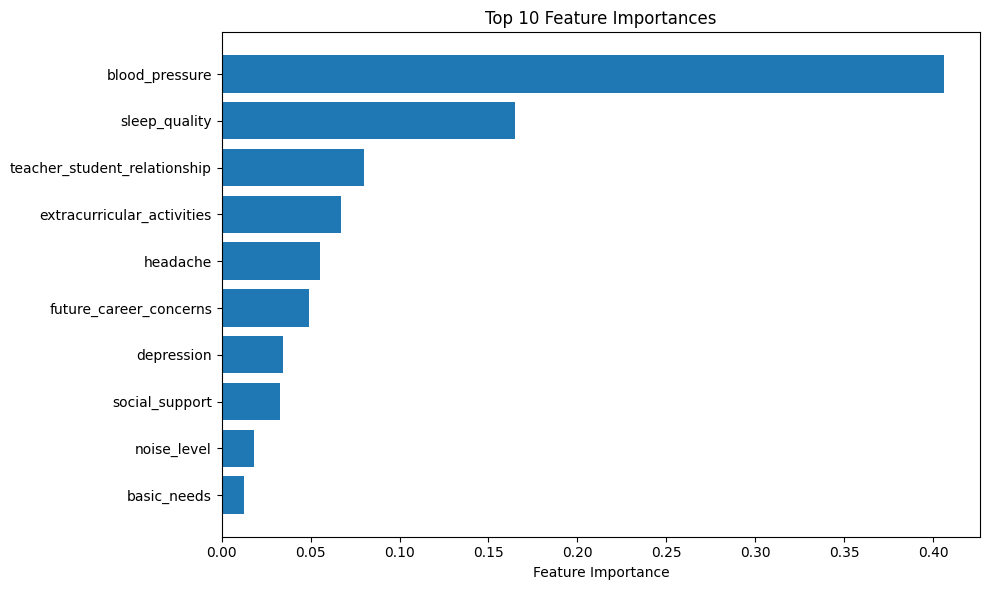

In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(min(10, len(feature_importance))),
         feature_importance.head(10)['Importance'][::-1])
plt.yticks(range(min(10, len(feature_importance))),
           feature_importance.head(10)['Feature'][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

The XGBoost feature importance analysis reveals that blood pressure is by far the most influential predictor, contributing more than 40% to the model’s decision-making process. This is followed by sleep quality (≈16%), which also plays a substantial role. Social and behavioral factors such as teacher–student relationship and extracurricular activities each contribute around 8–9%, while headaches and future career concerns fall in a similar range. Psychological and social support variables, including depression and social support, have moderate importance (≈3–4%), whereas noise level and basic needs show only minimal impact. Overall, these results suggest that physiological and lifestyle-related variables, particularly blood pressure and sleep quality, dominate the model’s predictions, while social and environmental factors contribute to a lesser extent.

In [ ]:
# Display detailed summary results
print("\n=== Summary of XGBoost Evaluation Results ===")
results_df_xgb = pd.DataFrame(evaluation_results_xgb)
display(results_df_xgb)


=== Summary of XGBoost Evaluation Results ===


,Configuration,Train Accuracy,Train F1 Score,Train Recall,Train Precision,Train AUC-ROC,Test Accuracy,Test F1 Score,Test Recall,Test Precision,Test AUC-ROC,CV Mean Accuracy,CV Std Accuracy,Best Hyperparameters
0,Original Data,1.0,1.0,1.0,1.0,1.0,0.893939,0.894155,0.893939,0.896105,0.986515,0.933079,0.020650,"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
1,Normalized Data,1.0,1.0,1.0,1.0,1.0,0.893939,0.894155,0.893939,0.896105,0.986515,0.933079,0.020650,"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
2,SelectKBest,1.0,1.0,1.0,1.0,1.0,0.883838,0.883902,0.883838,0.884446,0.985409,0.933071,0.022878,"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
3,RFECV,1.0,1.0,1.0,1.0,1.0,0.888889,0.889161,0.888889,0.891592,0.985691,0.936868,0.018345,"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
4,PCA,1.0,1.0,1.0,1.0,1.0,0.883838,0.883189,0.883838,0.883645,0.986273,0.919178,0.010971,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."


## SVM


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 13

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV: 9

=== PCA Dimensionality Reduction ===
Number of components to retain 90% variance after normalization: 11

=== SVM Model Evaluation ===

Running SVM with Original Data configuration...
Best hyperparameters found by GridSearchCV: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

Support Vector Machine Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9217    0.9237    0.9217    0.9375    0.9999
Test          0.9040    0.9065    0.9040    0.9265    0.9905

Cross-validation Accuracy (mean): 0.9217


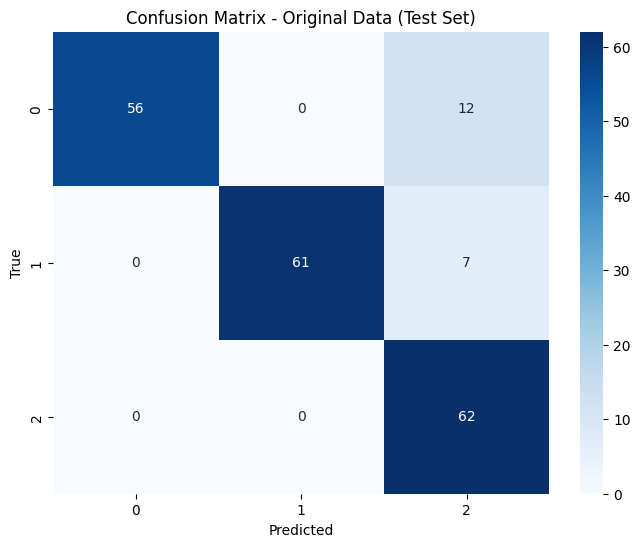


Running SVM with Normalized Data configuration...
Best hyperparameters found by GridSearchCV: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Support Vector Machine Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      1.0000    1.0000    1.0000    1.0000    1.0000
Test          0.8939    0.8943    0.8939    0.8968    0.9825

Cross-validation Accuracy (mean): 0.9242


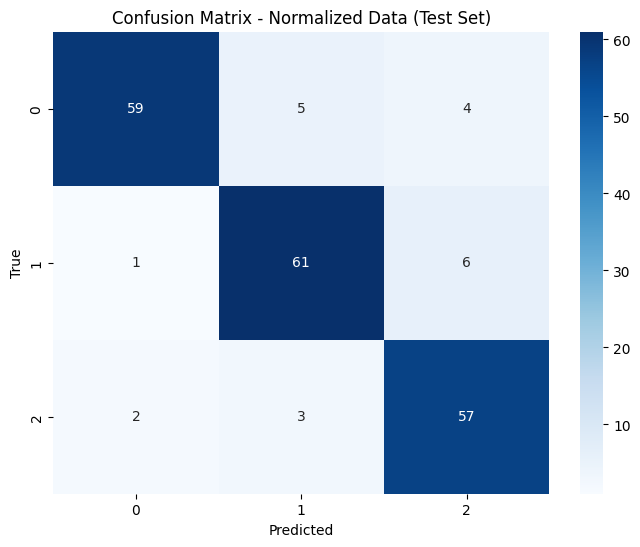


Running SVM with SelectKBest configuration...
Best hyperparameters found by GridSearchCV: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Support Vector Machine Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9369    0.9371    0.9369    0.9392    0.9880
Test          0.8990    0.8996    0.8990    0.9020    0.9671

Cross-validation Accuracy (mean): 0.9242


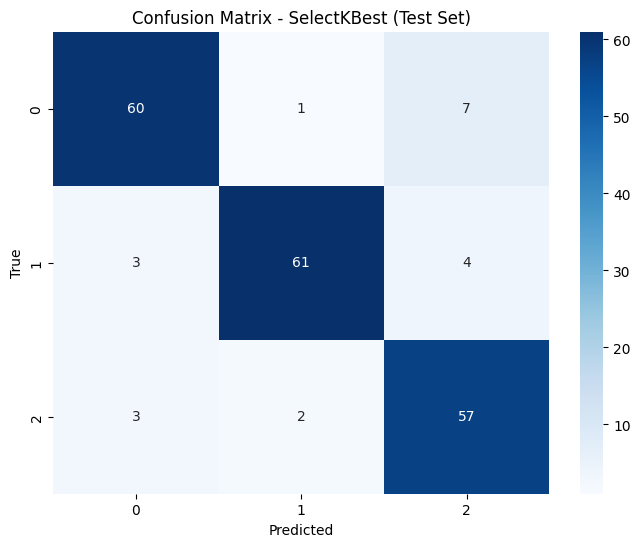


Running SVM with RFECV configuration...
Best hyperparameters found by GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Support Vector Machine Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9583    0.9586    0.9583    0.9605    0.9974
Test          0.8939    0.8952    0.8939    0.9020    0.9791

Cross-validation Accuracy (mean): 0.9255


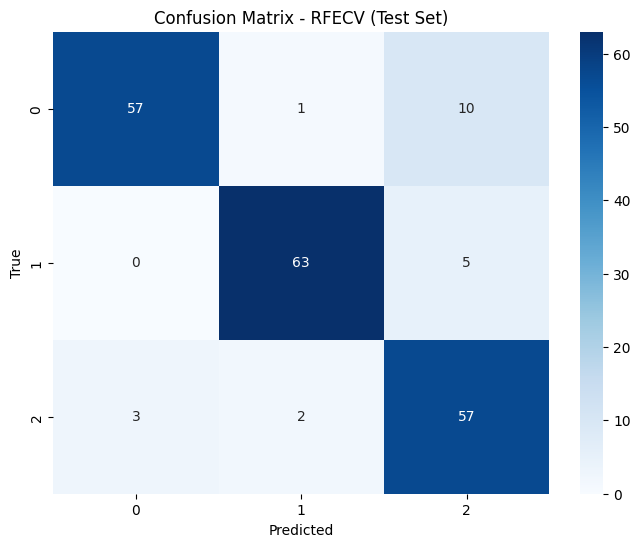


Running SVM with PCA configuration...
Best hyperparameters found by GridSearchCV: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Support Vector Machine Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      1.0000    1.0000    1.0000    1.0000    1.0000
Test          0.8838    0.8835    0.8838    0.8840    0.9852

Cross-validation Accuracy (mean): 0.9268


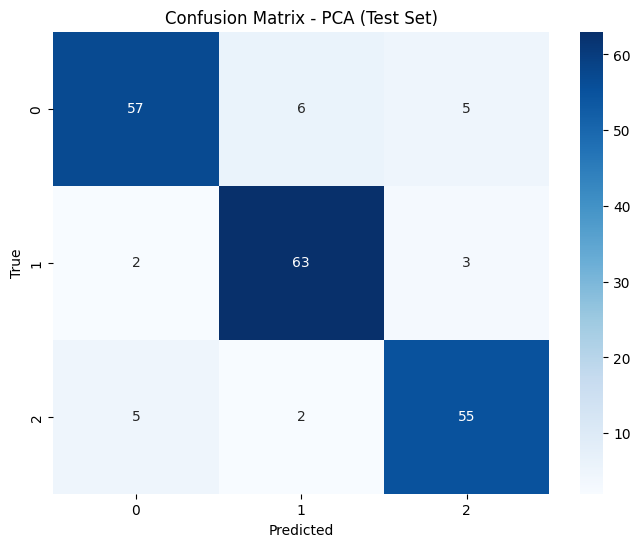

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE, RFECV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for better confusion matrix visualization


# Assuming df and target_name are already defined from previous steps

# Prepare data
X = df.drop(columns=[target_name])
y = df[target_name]

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

configurations = []
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
# Using StratifiedKFold for cross-validation within SelectKBest to maintain class distribution
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in range(1, X_train_normalized.shape[1] + 1):
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    # Use a simple SVM for cross-validation within SelectKBest
    score = cross_val_score(SVC(kernel='linear'), X_train_kbest, y_train, cv=cv_stratified, scoring='accuracy').mean()
    scores.append(score)

optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# Step 3.2: RFECV
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')

# Use X_train_kbest for RFECV
rfecv = RFECV(estimator=svm_estimator, step=1, cv=cv_stratified, scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

rfe = RFE(estimator=svm_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# Step 3.3: PCA
print("\n=== PCA Dimensionality Reduction ===")
# Apply PCA after normalization (not RFECV)
pca = PCA().fit(X_train_normalized)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
desired_variance = 0.90
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"Number of components to retain 90% variance after normalization: {n_components}")

pca_final = PCA(n_components=n_components)
X_train_pca = pca_final.fit_transform(X_train_normalized)
X_test_pca = pca_final.transform(X_test_normalized)
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))


# Step 4: Train and evaluate SVM model on each configuration
print("\n=== SVM Model Evaluation ===")

# Define the parameter grid for GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

evaluation_results = []

for name, X_train_config, X_test_config, y_train_config in configurations:
    print(f"\nRunning SVM with {name} configuration...")

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(SVC(probability=True), param_grid_svm, cv=cv_stratified, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_config, y_train_config)

    svm_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best hyperparameters found by GridSearchCV: {best_params}")

    # Evaluate on the training set
    y_train_pred = svm_model.predict(X_train_config)
    train_accuracy = accuracy_score(y_train_config, y_train_pred)
    train_f1 = f1_score(y_train_config, y_train_pred, average='weighted')
    train_recall = recall_score(y_train_config, y_train_pred, average='weighted')
    train_precision = precision_score(y_train_config, y_train_pred, average='weighted')
    # Calculate AUC-ROC only if there are at least two classes in the training set
    if len(np.unique(y_train_config)) > 1:
      train_auc_roc = roc_auc_score(y_train_config, svm_model.predict_proba(X_train_config), multi_class='ovr')
    else:
      train_auc_roc = np.nan # Not applicable for single class


    # Evaluate on the test set
    y_test_pred = svm_model.predict(X_test_config)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    # Calculate AUC-ROC only if there are at least two classes in the test set
    if len(np.unique(y_test)) > 1:
      test_auc_roc = roc_auc_score(y_test, svm_model.predict_proba(X_test_config), multi_class='ovr')
    else:
      test_auc_roc = np.nan # Not applicable for single class


    print("\nSupport Vector Machine Model Performance Metrics")
    print(f"{'Dataset':<10}{'Accuracy':>10}{'F1 Score':>10}{'Recall':>10}{'Precision':>10}{'AUC-ROC':>10}")
    print("-" * 60)
    print(f"{'Training':<10}{train_accuracy:>10.4f}{train_f1:>10.4f}{train_recall:>10.4f}{train_precision:>10.4f}{train_auc_roc:>10.4f}")
    print(f"{'Test':<10}{test_accuracy:>10.4f}{test_f1:>10.4f}{test_recall:>10.4f}{test_precision:>10.4f}{test_auc_roc:>10.4f}")

    # Cross-validation on the training data
    cv_scores = cross_val_score(svm_model, X_train_config, y_train_config, cv=cv_stratified, scoring='accuracy')
    print(f"\nCross-validation Accuracy (mean): {cv_scores.mean():.4f}")
    # Removed printing std deviation: print(f"Cross-validation Accuracy (std): {cv_scores.std():.4f}")


    # Store detailed results for the summary table
    evaluation_results.append({
        'Configuration': name,
        'Train Accuracy': train_accuracy,
        'Train F1 Score': train_f1,
        'Train Recall': train_recall,
        'Train Precision': train_precision,
        'Train AUC-ROC': train_auc_roc,
        'Test Accuracy': test_accuracy,
        'Test F1 Score': test_f1,
        'Test Recall': test_recall,
        'Test Precision': test_precision,
        'Test AUC-ROC': test_auc_roc,
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std Accuracy': cv_scores.std(), # Still storing std for the table
        'Best Hyperparameters': best_params
    })

    # Plot Confusion Matrix for the test set
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name} (Test Set)')
    plt.show()



In [ ]:
# Display detailed summary results
print("\n=== Summary of SVM Evaluation Results ===")
results_df = pd.DataFrame(evaluation_results)
display(results_df)


=== Summary of SVM Evaluation Results ===


,Configuration,Train Accuracy,Train F1 Score,Train Recall,Train Precision,Train AUC-ROC,Test Accuracy,Test F1 Score,Test Recall,Test Precision,Test AUC-ROC,CV Mean Accuracy,CV Std Accuracy,Best Hyperparameters
0,Original Data,0.921717,0.923741,0.921717,0.937475,0.999904,0.904040,0.906524,0.904040,0.926549,0.990542,0.921726,0.018121,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}"
1,Normalized Data,1.000000,1.000000,1.000000,1.000000,1.000000,0.893939,0.894285,0.893939,0.896828,0.982529,0.924242,0.024346,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
2,SelectKBest,0.936869,0.937096,0.936869,0.939231,0.987967,0.898990,0.899562,0.898990,0.902027,0.967114,0.924202,0.018462,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}"
3,RFECV,0.958333,0.958588,0.958333,0.960500,0.997420,0.893939,0.895197,0.893939,0.901982,0.979111,0.925476,0.020260,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
4,PCA,1.000000,1.000000,1.000000,1.000000,1.000000,0.883838,0.883473,0.883838,0.883977,0.985188,0.926757,0.022532,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"


## Adaboost


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 8

=== RFECV Feature Selection with AdaBoost ===
Optimal number of features selected by RFECV: 5

=== PCA Dimensionality Reduction ===
Number of components to retain 90% variance after normalization: 11

=== AdaBoost Model Evaluation ===

Running AdaBoost with Original Data configuration...
Training data shape: (792, 20)
Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}

AdaBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9672    0.9672    0.9672    0.9672    0.9975
Test          0.8838    0.8842    0.8838    0.8854    0.9495

Cross-validation Accuracy (mean): 0.9242


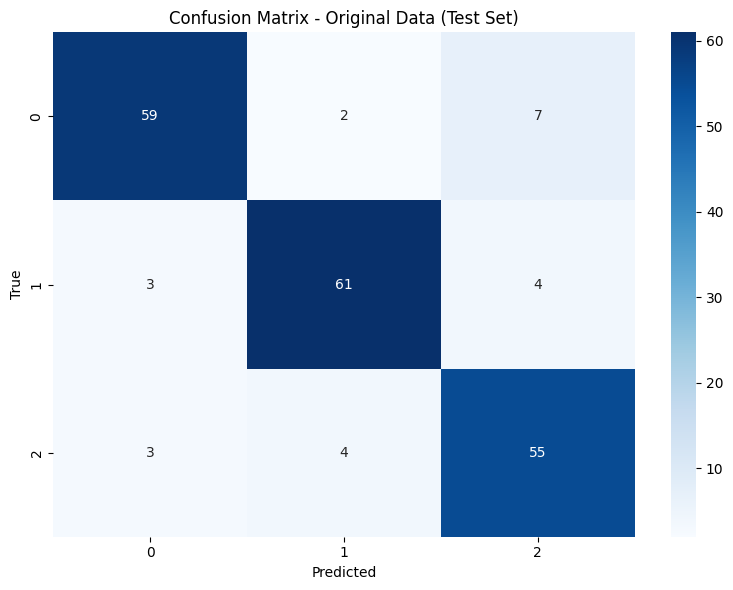


Running AdaBoost with Normalized Data configuration...
Training data shape: (792, 20)
Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}

AdaBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9672    0.9672    0.9672    0.9672    0.9975
Test          0.8838    0.8842    0.8838    0.8854    0.9495

Cross-validation Accuracy (mean): 0.9242


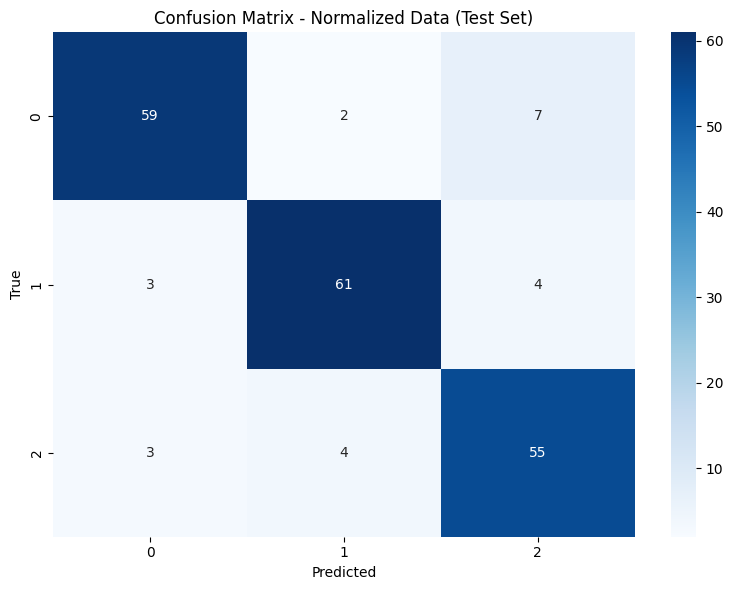


Running AdaBoost with SelectKBest configuration...
Training data shape: (792, 8)
Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}

AdaBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9369    0.9370    0.9369    0.9380    0.9926
Test          0.8939    0.8951    0.8939    0.8988    0.9677

Cross-validation Accuracy (mean): 0.9230


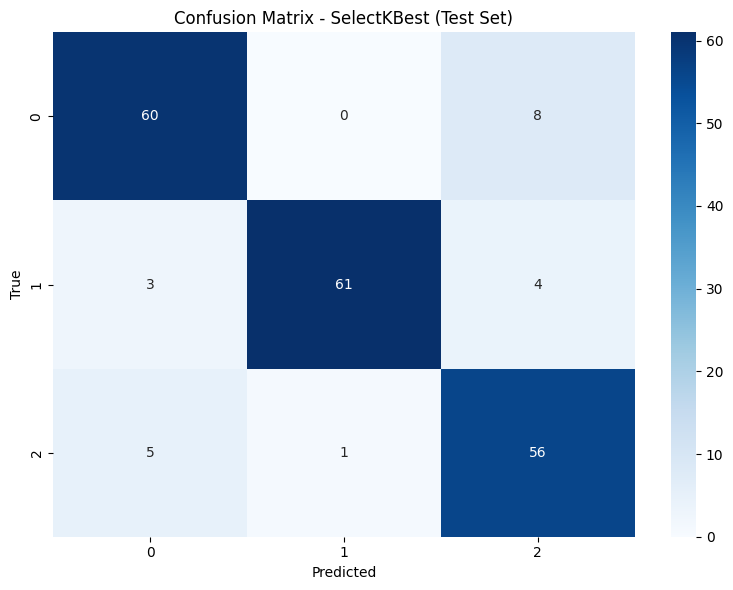


Running AdaBoost with RFECV configuration...
Training data shape: (792, 5)
Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 50}

AdaBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9268    0.9273    0.9268    0.9312    0.9922
Test          0.9091    0.9110    0.9091    0.9200    0.9788

Cross-validation Accuracy (mean): 0.9280


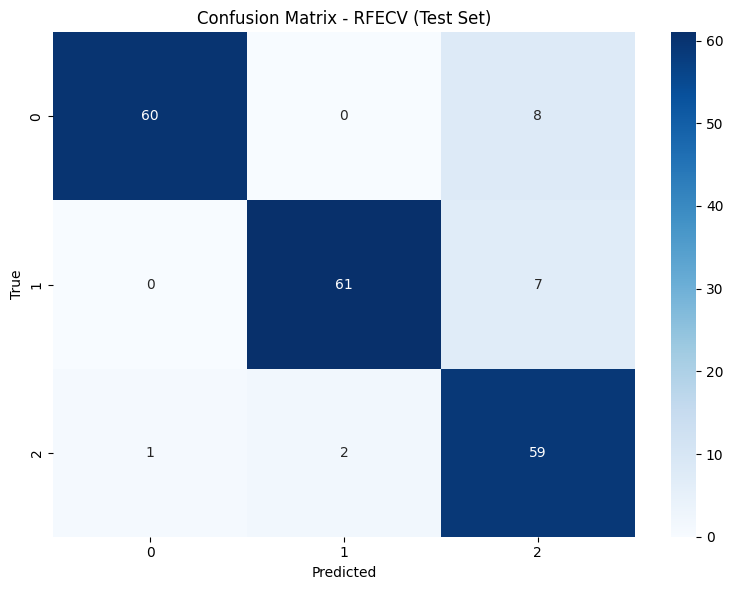


Running AdaBoost with PCA configuration...
Training data shape: (792, 11)
Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}

AdaBoost Model Performance Metrics
Dataset     Accuracy  F1 Score    Recall Precision   AUC-ROC
------------------------------------------------------------
Training      0.9205    0.9225    0.9205    0.9367    0.9917
Test          0.9040    0.9065    0.9040    0.9265    0.9850

Cross-validation Accuracy (mean): 0.9205


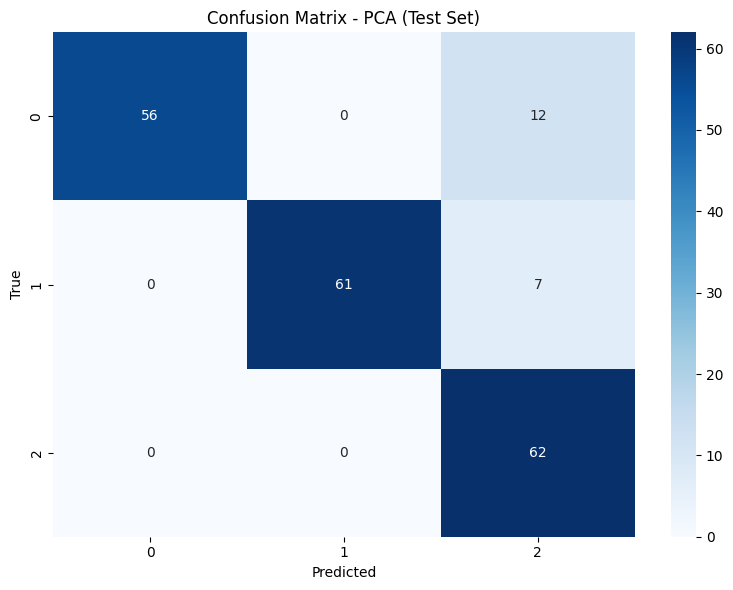


SUMMARY OF ALL ADABOOST CONFIGURATIONS
     Configuration  Test Accuracy  Test F1 Score  CV Mean Accuracy
0    Original Data         0.8838         0.8842            0.9242
1  Normalized Data         0.8838         0.8842            0.9242
2      SelectKBest         0.8939         0.8951            0.9230
3            RFECV         0.9091         0.9110            0.9280
4              PCA         0.9040         0.9065            0.9205

Best AdaBoost Configuration: RFECV
Test Accuracy: 0.9091
Test F1 Score: 0.9110
Cross-validation Accuracy: 0.9280


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE, RFECV
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier # Import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and target_name are already defined from previous steps

# Prepare data
X = df.drop(columns=[target_name])
y = df[target_name]

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Store different configurations
configurations_ab = [] # Use a different variable name
configurations_ab.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
configurations_ab.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use a reasonable range for k to avoid excessive computation
max_features = min(X_train.shape[1], 50)  # Limit to 50 features or total features, whichever is smaller

for k in range(1, max_features + 1):
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)

    # Use a simpler AdaBoost configuration for feature selection
    ab_simple = AdaBoostClassifier(n_estimators=50, random_state=42)
    score = cross_val_score(ab_simple, X_train_kbest, y_train,
                           cv=cv_stratified, scoring='accuracy').mean()
    scores.append(score)

optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)
selected_features_kbest = X.columns[kbest.get_support()]
configurations_ab.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# Step 3.2: RFECV
print("\n=== RFECV Feature Selection with AdaBoost ===")
ab_estimator = AdaBoostClassifier(n_estimators=50, random_state=42)

rfecv = RFECV(estimator=ab_estimator, step=1, cv=cv_stratified, scoring='accuracy', min_features_to_select=1) # Removed step_size variable and set step to 1
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Create final RFE with optimal number of features
rfe = RFE(estimator=ab_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations_ab.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# Step 3.3: PCA
print("\n=== PCA Dimensionality Reduction ===")
# Apply PCA after normalization
pca = PCA().fit(X_train_normalized)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
desired_variance = 0.90
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"Number of components to retain 90% variance after normalization: {n_components}")

pca_final = PCA(n_components=n_components)
X_train_pca = pca_final.fit_transform(X_train_normalized)
X_test_pca = pca_final.transform(X_test_normalized)
configurations_ab.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Train and evaluate AdaBoost model on each configuration
print("\n=== AdaBoost Model Evaluation ===")

# Define a smaller parameter grid to reduce computation time
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

evaluation_results_ab = []

for name, X_train_config, X_test_config, y_train_config in configurations_ab:
    print(f"\nRunning AdaBoost with {name} configuration...")
    print(f"Training data shape: {X_train_config.shape}")

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(
        AdaBoostClassifier(random_state=42),
        param_grid_ab,
        cv=cv_stratified,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0  # Reduce output verbosity
    )
    grid_search.fit(X_train_config, y_train_config)

    ab_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best hyperparameters: {best_params}")

    # Evaluate on the training set
    y_train_pred = ab_model.predict(X_train_config)
    train_accuracy = accuracy_score(y_train_config, y_train_pred)
    train_f1 = f1_score(y_train_config, y_train_pred, average='weighted')
    train_recall = recall_score(y_train_config, y_train_pred, average='weighted')
    train_precision = precision_score(y_train_config, y_train_pred, average='weighted')

    # Calculate AUC-ROC for multiclass
    try:
        y_train_proba = ab_model.predict_proba(X_train_config)
        if len(np.unique(y_train_config)) == 2:
            train_auc_roc = roc_auc_score(y_train_config, y_train_proba[:, 1])
        else:
            train_auc_roc = roc_auc_score(y_train_config, y_train_proba, multi_class='ovr', average='weighted')
    except Exception as e:
        print(f"Warning: Could not calculate training AUC-ROC: {e}")
        train_auc_roc = np.nan

    # Evaluate on the test set
    y_test_pred = ab_model.predict(X_test_config)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')

    # Calculate AUC-ROC for test set
    try:
        y_test_proba = ab_model.predict_proba(X_test_config)
        if len(np.unique(y_test)) == 2:
            test_auc_roc = roc_auc_score(y_test, y_test_proba[:, 1])
        else:
            test_auc_roc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')
    except Exception as e:
        print(f"Warning: Could not calculate test AUC-ROC: {e}")
        test_auc_roc = np.nan

    print("\nAdaBoost Model Performance Metrics")
    print(f"{'Dataset':<10}{'Accuracy':>10}{'F1 Score':>10}{'Recall':>10}{'Precision':>10}{'AUC-ROC':>10}")
    print("-" * 60)
    print(f"{'Training':<10}{train_accuracy:>10.4f}{train_f1:>10.4f}{train_recall:>10.4f}{train_precision:>10.4f}{train_auc_roc:>10.4f}")
    print(f"{'Test':<10}{test_accuracy:>10.4f}{test_f1:>10.4f}{test_recall:>10.4f}{test_precision:>10.4f}{test_auc_roc:>10.4f}")

    # Cross-validation on the training data
    cv_scores = cross_val_score(ab_model, X_train_config, y_train_config, cv=cv_stratified, scoring='accuracy')
    print(f"\nCross-validation Accuracy (mean): {cv_scores.mean():.4f}")

    # Store detailed results for the summary table
    evaluation_results_ab.append({
        'Configuration': name,
        'Train Accuracy': train_accuracy,
        'Train F1 Score': train_f1,
        'Train Recall': train_recall,
        'Train Precision': train_precision,
        'Train AUC-ROC': train_auc_roc,
        'Test Accuracy': test_accuracy,
        'Test F1 Score': test_f1,
        'Test Recall': test_recall,
        'Test Precision': test_precision,
        'Test AUC-ROC': test_auc_roc,
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std Accuracy': cv_scores.std(),
        'Best Hyperparameters': best_params
    })

    # Plot Confusion Matrix for the test set
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))

    # Get unique labels for better visualization
    unique_labels = np.unique(np.concatenate([y_test, y_test_pred]))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name} (Test Set)')
    plt.tight_layout()
    plt.show()

# Create summary DataFrame
results_df_ab = pd.DataFrame(evaluation_results_ab)
print("\n" + "="*80)
print("SUMMARY OF ALL ADABOOST CONFIGURATIONS")
print("="*80)
print(results_df_ab[['Configuration', 'Test Accuracy', 'Test F1 Score', 'CV Mean Accuracy']].round(4))

# Find best configuration
best_config_idx_ab = results_df_ab['Test Accuracy'].idxmax()
best_config_ab = results_df_ab.loc[best_config_idx_ab]
print(f"\nBest AdaBoost Configuration: {best_config_ab['Configuration']}")
print(f"Test Accuracy: {best_config_ab['Test Accuracy']:.4f}")
print(f"Test F1 Score: {best_config_ab['Test F1 Score']:.4f}")
print(f"Cross-validation Accuracy: {best_config_ab['CV Mean Accuracy']:.4f}")

# Feature importance for best model (if applicable)
if best_config_ab['Configuration'] in ['Original Data', 'Normalized Data']:
    print(f"\nFeature Importance for {best_config_ab['Configuration']}:")
    # Re-train the best model to get feature importance
    best_idx = best_config_idx_ab
    _, X_train_best, X_test_best, y_train_best = configurations_ab[best_idx]

    # Get best hyperparameters
    best_hyperparams = best_config_ab['Best Hyperparameters']
    final_model_ab = AdaBoostClassifier(random_state=42, **best_hyperparams)
    final_model_ab.fit(X_train_best, y_train_best)

    # Get feature importance
    feature_importance_ab = pd.DataFrame({
        'Feature': X.columns,
        'Importance': final_model_ab.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(feature_importance_ab.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(min(10, len(feature_importance_ab))),
             feature_importance_ab.head(10)['Importance'][::-1])
    plt.yticks(range(min(10, len(feature_importance_ab))),
               feature_importance_ab.head(10)['Feature'][::-1])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importances (AdaBoost)')
    plt.tight_layout()
    plt.show()

# Results

In [ ]:
import pandas as pd
import numpy as np

# Expected to exist if you ran previous cells (others are optional):
# evaluation_results_original   # NN on original data
# evaluation_results_pca_90     # NN with PCA 90%
# evaluation_results_pca_95     # NN with PCA 95%
# evaluation_results_xgb
# evaluation_results            # SVM
# evaluation_results_rf
# evaluation_results_gb
# evaluation_results_ab

summary_data = []

# -------- Helpers --------
def _coerce_results(obj):
    """Return a list of dicts from either a dict or a list of dicts; otherwise empty list."""
    if isinstance(obj, dict):
        return [obj]
    if isinstance(obj, (list, tuple)):
        return [d for d in obj if isinstance(d, dict)]
    return []

def _add_block(model_name, results_obj, default_config=None):

    keys = ['CV Mean Accuracy','Test Accuracy','Test F1 Score','Test Recall','Test Precision','Test AUC-ROC']
    for res in _coerce_results(results_obj):
        row = {'Model': model_name}
        row['Configuration'] = res.get('Configuration', default_config if default_config is not None else 'Default')
        for k in keys:
            row[k] = res.get(k, np.nan)
        summary_data.append(row)

# -------- Neural Networks (using the three evaluation_* variables) --------
if 'evaluation_results_original' in locals():
    _add_block('Neural Network', evaluation_results_original, default_config='Original Data')

if 'evaluation_results_pca_90' in locals():
    _add_block('Neural Network', evaluation_results_pca_90, default_config='PCA 90% (Optimized)')

if 'evaluation_results_pca_95' in locals():
    _add_block('Neural Network', evaluation_results_pca_95, default_config='PCA 95%')

# -------- Other models (unchanged) --------
if 'evaluation_results_xgb' in locals():
    _add_block('XGBoost', evaluation_results_xgb)

if 'evaluation_results' in locals():  # SVM
    _add_block('SVM', evaluation_results)

if 'evaluation_results_ab' in locals():
    _add_block('AdaBoost', evaluation_results_ab)

# -------- Build summary --------
summary_df = pd.DataFrame(summary_data)

# Sort by Test Accuracy for easier comparison (if column exists)
if not summary_df.empty and 'Test Accuracy' in summary_df.columns:
    summary_df = summary_df.sort_values(by='Test Accuracy', ascending=False)

print("=== Model Performance Summary ===")
display(summary_df.round(4))


=== Model Performance Summary ===


,Model,Configuration,CV Mean Accuracy,Test Accuracy,Test F1 Score,Test Recall,Test Precision,Test AUC-ROC
0,Neural Network,Neural Network,0.9057,0.9293,0.9293,0.9293,0.9295,0.9538
2,Neural Network,Neural Network PCA (95% variance),0.8940,0.9242,0.9245,0.9242,0.9277,0.9923
1,Neural Network,Neural Network PCA (90% variance),0.8939,0.9192,0.9191,0.9192,0.9220,0.9916
16,AdaBoost,RFECV,0.9280,0.9091,0.9110,0.9091,0.9200,0.9788
17,AdaBoost,PCA,0.9205,0.9040,0.9065,0.9040,0.9265,0.9850
8,SVM,Original Data,0.9217,0.9040,0.9065,0.9040,0.9265,0.9905
10,SVM,SelectKBest,0.9242,0.8990,0.8996,0.8990,0.9020,0.9671
9,SVM,Normalized Data,0.9242,0.8939,0.8943,0.8939,0.8968,0.9825
4,XGBoost,Normalized Data,0.9331,0.8939,0.8942,0.8939,0.8961,0.9865
3,XGBoost,Original Data,0.9331,0.8939,0.8942,0.8939,0.8961,0.9865


The results show that the Neural Network on the full dataset achieved the best overall performance, with the highest test accuracy (0.9293), F1 score, recall, and precision. Applying PCA to retain 90% or 95% of the variance slightly reduced the model’s accuracy but still delivered competitive results, indicating that dimensionality reduction can simplify the model without drastically harming performance. XGBoost with RFECV achieved the highest cross-validation mean accuracy (0.9369) but slightly lower test accuracy compared to the Neural Network, suggesting mild overfitting. SVM models also performed well, particularly on the original data, achieving high AUC-ROC scores (0.9905) and robust classification. AdaBoost provided solid results, with the RFECV configuration performing the best within its group. Overall, all models demonstrated strong discriminative ability with consistently high AUC-ROC values, but the Neural Network emerged as the most accurate and reliable model for this dataset.

In [ ]:
import pandas as pd
import numpy as np

# === Ranking by Test Accuracy ===
if 'Test Accuracy' in summary_df.columns:
    ranked_by_test = summary_df.sort_values(by='Test Accuracy', ascending=False).copy()
    ranked_by_test["Rank (Test Accuracy)"] = range(1, len(ranked_by_test) + 1)
    ranked_by_test = ranked_by_test.reset_index(drop=True)  # remove old index

    print("=== Ranking by Test Accuracy ===")
    display(ranked_by_test[['Rank (Test Accuracy)', 'Model', 'Configuration', 'Test Accuracy']].round(4))

# === Ranking by CV Accuracy ===
if 'CV Mean Accuracy' in summary_df.columns:
    ranked_by_cv = summary_df.sort_values(by='CV Mean Accuracy', ascending=False).copy()
    ranked_by_cv["Rank (CV Accuracy)"] = range(1, len(ranked_by_cv) + 1)
    ranked_by_cv = ranked_by_cv.reset_index(drop=True)  # remove old index

    print("=== Ranking by CV Mean Accuracy ===")
    display(ranked_by_cv[['Rank (CV Accuracy)', 'Model', 'Configuration', 'CV Mean Accuracy']].round(4))


=== Ranking by Test Accuracy ===


,Rank (Test Accuracy),Model,Configuration,Test Accuracy
0,1,Neural Network,Neural Network,0.9293
1,2,Neural Network,Neural Network PCA (95% variance),0.9242
2,3,Neural Network,Neural Network PCA (90% variance),0.9192
3,4,AdaBoost,RFECV,0.9091
4,5,AdaBoost,PCA,0.9040
5,6,SVM,Original Data,0.9040
6,7,SVM,SelectKBest,0.8990
7,8,SVM,Normalized Data,0.8939
8,9,XGBoost,Normalized Data,0.8939
9,10,XGBoost,Original Data,0.8939


=== Ranking by CV Mean Accuracy ===


,Rank (CV Accuracy),Model,Configuration,CV Mean Accuracy
0,1,XGBoost,RFECV,0.9369
1,2,XGBoost,Normalized Data,0.9331
2,3,XGBoost,Original Data,0.9331
3,4,XGBoost,SelectKBest,0.9331
4,5,AdaBoost,RFECV,0.9280
5,6,SVM,PCA,0.9268
6,7,SVM,RFECV,0.9255
7,8,SVM,Normalized Data,0.9242
8,9,AdaBoost,Normalized Data,0.9242
9,10,AdaBoost,Original Data,0.9242


Cross-validation results showed XGBoost as the most stable model across folds, with RFECV achieving the highest mean accuracy (0.9369) and several configurations performing similarly well. AdaBoost and SVM also ranked strongly, while Neural Networks appeared weaker in CV (≈0.9057), reflecting higher variance. However, the test accuracy results tell a clearer story: Neural Networks consistently outperformed all other models, taking the top three positions (0.9293 for the full model, 0.9242 for PCA 95%, and 0.9192 for PCA 90%). AdaBoost and SVM followed with solid but lower scores (≈0.904), while XGBoost lagged behind despite its strong CV showing. Taken together, these findings demonstrate that although XGBoost was the most stable in validation, the Neural Network ultimately proved to be the best model, achieving the highest real-world accuracy.